# **Assignment 1**

The first thing that is done is the importing of data inside of a CSV file which was put together using BigQuery.

The data is of incidents which occured and the weather on that given day from the station number '725060' which is New York City.

# **Notes on Other Similar Studies**

There have been previous studies similar in topic to this one, one being "Ambient temperatures associated with increased risk of motor vehicle crashes in New York and Chicago" by (Hou et al., 2020). In the study done by (Hou et al., 2020) it was to see if temperature difference would indicate more or less collisions in New York and Chicago. They did find that "abnormal cold and hot temperatures have a significant impact on the increased risk of motor vehicle crashes in New York, and cold temperature has a significant impact on the increased risk of motor vehicle crashes in Chicago."

Another similar study was done by (Shaaban and Ibrahim, 2021) by the title of "Analysis and Identification of Contributing Factors of Traffic Crashes in New York City". The study was to gain insights into the patterns and factors contributing to accidents that led to injuries or fatalities in New York City from 2013-2019. The study did find that there were 3 main reasons for accidents resulting in injuries or fatalities was down to driver distraction, failure to yield to the right-of-way and speeding. It also stated that in the summer it showed to have slightly higher numbers of injures or fatal crashes but did not note it to be a contributing factor to the crashes.

One last study that I looked at that was similar in nature was done by (Medina et al., 2017) by the title of "Characterizing and Predicting Traffic Accidents in Extreme Weather Environments". The study looked to find if there was any correlation between traffic accidents from various factors ranging from human behaviour, vehicle characteristics, and environmental conditions. The study did find that there is a correlation to traffic accidents during extreme weather events which are a result of human behaviour, vehicle characteristics, and environmental conditions. The authors developed a methodology to help identify regions that are vulnerable and can assist in planning and mitigating them to reduce accidents caused by these factors.

# **How The Data Was Put Together**

As mentioned, the data was gathered using BigQuery. BigQuery gives access to public datasets, the public datasets used for this analysis are GSOD (Global Surface Summary of the Day Weather Data) for the weather data and NYPD Motor Vehicle Collisions for the collision data of New York City.

To merge the data into one table, SQL was used inside of BigQuery, each query having a direct purpose in the final dataset that is used for this analysis.

Firstly, getting all the weather data for the years between 2012 and 2019 were as follows:

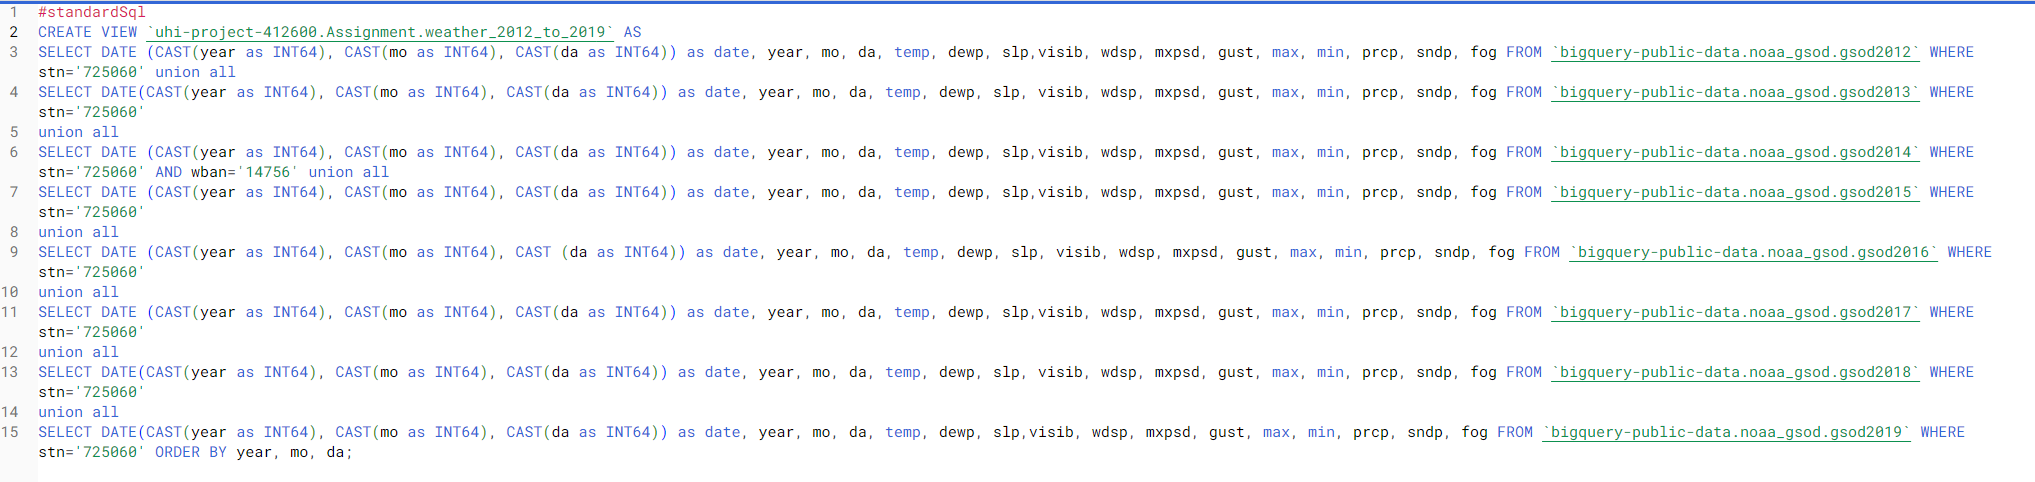

From here I then get the count of collisions in New York City each day, using this SQL query:

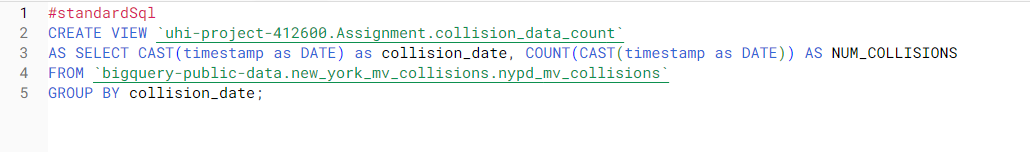

I can now add the day of the week column represented as numbers, 1 being Monday and 7 being Sunday, this was done using this SQL query:

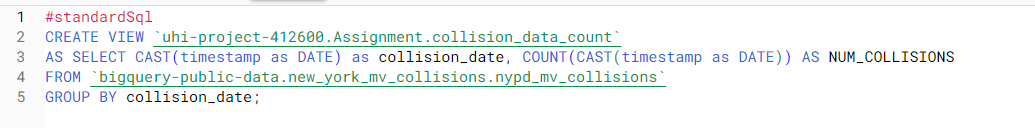

Now that has been done the data is ready to be collated into one big table with the weather data included, the collation of the data is done using this SQL query:

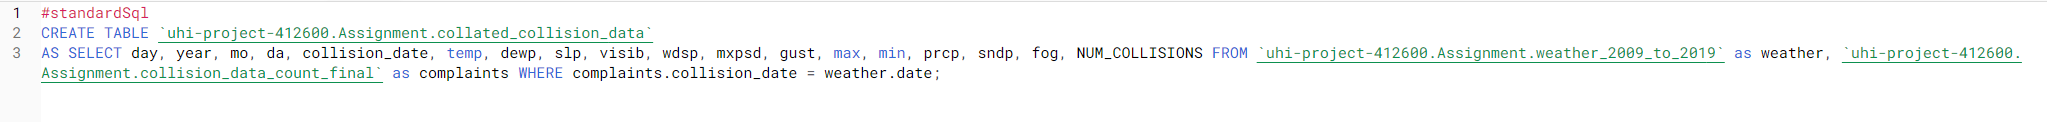

Something to note is that the collated data does not include the dates from the weather data where there are no dates in the collision data.

# **Importing The Data**

The data being imported is of the number of collisions in New York City per day and the corresponding weather for that day. The timeframe of this data is from 2012-2019, this is because the data for the collisions only goes as far back as the 1st of July 2012. As covid was a thing in 2020 there was a lockdown in New York starting in March of 2020 (Huang and Li, 2022). Because of this less people were travelling to get into accidents which will cause a major change in the data which I do not want. I want the data to be purely based on the normal amount of drivers per day without drastic fluctuations being caused by the covid years which is why I've only gone as far as 2019.

In [ ]:
# import the CSV file containing all the data
# data will be the variable that holds all the CSV data in a dataframe format that works with R
data <- read.csv("https://raw.githubusercontent.com/HarrisMoff/15026015_DataAnalytics/main/Assignment%201/Assignment_1_collated_data.csv", stringsAsFactors = TRUE)

Now that the file has been imported and run, we can start to analyse the data within it, using the code below it will show the first 6 records of the data. I will do this to show you an example of how the data is formatted.

In [ ]:
# shows the first 6 pieces of data from the CSV file
head(data)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max min 
1 2   2018 1   2 2018-01-02     14.7  2.0 1024.9 10.0  12.9 20.0  31.1 18   5.0
2 1   2018 1   1 2018-01-01      9.5 -0.5 1022.2 10.0  15.0 18.1  25.1 21   5.0
3 5   2014 1  24 2014-01-24     14.8 -0.5 1022.4 10.0  11.8 15.9  22.9 23   9.0
4 4   2015 1   8 2015-01-08     13.1 -2.4 1022.7  9.9  14.8 21.0  29.9 27   6.1
5 6   2018 1   6 2018-01-06     13.2 -0.2 1013.5 10.0  22.4 28.0  39.0 27  10.9
6 3   2015 1   7 2015-01-07     22.6 10.2 1011.8  9.4  12.1 26.0  35.9 27  17.1
  prcp sndp  fog NUM_COLLISIONS
1 0    999.9 0   654           
2 0    999.9 0   453           
3 0    999.9 0   705           
4 0    999.9 0   573           
5 0    999.9 0   599           
6 0    999.9 0   538

# **Goals of the analysis and what the variables mean**

The goal of this report is to analyse the number of collisions per day in New York and the weather in New York City on the day of the collisions. At the end of the report, there will be a summation that will conclude whether or not the weather is a key determiner for collisions taking place.

The weather variables which you saw above in the short data snippet as an example consisted of temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, and fog. Here is a description of what all these variables stand for and what the data in these variables mean.

**Temp:** This variable stands for temperature and is the mean temperature for the day. It's measured in Fahrenheit to tenths. If the data is missing it will be = '9999.9'.

**Dewp:** This variable stands for dew point. It is the mean dew point for the day. It is measured in Fahrenheit to tenths. If the data is missing it will be = '9999.9'.

**Slp:** This variable stands for sea level pressure. It is the mean sea level pressure for the day. It is measured in millibars to tenths. If the data is missing it will be = '9999.9'.

**Visib:** This variable stands for visibility. It is the mean visibility for the day. It is measured in miles to tenths. If the data is missing it will be = '999.9'.

**Wdsp:** This variable stands for wind speed. It is the mean wind speed for the day. It is measured in knots to tenths. If the data is missing it will be = '999.9'.

**Mxpsd:** This variable stands for maximum sustained wind speed for the day. It is measured in knots to tenths. If the data is missing it will be = '999.9'.

**gust:** This variable is for the maximum wind gust reported for the day. It is measured in knots to tenths. If the data is missing it will be = '999.9'.

**Max:** This variable stands for maximum temperature. It is the maximum temperature recorded for the day. It is measured in Fahrenheit to tenths. If the data is missing it will be = '9999.9'. Something to note is the time of the maximum temperature being reported varies by country and region, which means sometimes it might not be the maximum temperature for the calendar day.

**Min:** This variable stands for minimum temperature. It is the minimum temperature recorded for the day. It is measured in Fahrenheit to tenths. If the data is missing it will be = '9999.9'. Something to note is the time of the minimum temperature being reported varies by country and region, which means sometimes it might not be the minimum temperature for the calendar day.

**Prcp:** This variable stands for the total precipitation (rainfall and or melted snow) reported for the day. It is measured in inches and hundredths. The recording of the data will not usually end at midnight meaning it may include the latter of the previous day. If the data is missing it will be = '99.99'. If the data is = '.00' this indicates there is no measurable precipitation for that day.

**Sndp:** This variable is for snow depth reported for the day. It is measured in inches to tenths. If the data is missing it will be = '999.9'. Something to note is the data for this field is the last report of the snow for that day, so if there is more than one report, it will be the last reported data. Another thing to note is that most stations do not report 0 on days with no snow on the ground meaning that '999.9' will appear regularly on these days.

**Fog:** This variable is for fog. The data inside this field is indicated by a 1 and a 0. 1 means there is fog and 0 means there is no fog, or it was not reported.

Looking at this there is a correlation between certain variables. These are temp, max and min for the temperature fields. Wdsp, mxpsd, and gust also correlate for the wind speed fields. The correlation of these fields will be explored further later in the report. Something to note here, while correlated predictors can give misleading results, they do not negatively affect the accuracy of the fit.


# **WDSP, Gust, MXPSD Collinearity**

There are two popular methods to use for collinearity, these being Pearson and Spearman. Each has its strengths, and knowing when to use them is important when it comes to analysing the data.

Pearson is typically best suited for data where you know the variables have a linear relationship and the data meets the assumptions of normality and linearity, then using Pearson would be best suited.

Spearman is typically best suited when you're unsure about the linearity of the relationship between the variables if the data does not meet the assumptions of normality, or if you suspect the presence of outliers that could affect the analysis, then Spearman would be most appropriate for use.

Now that we know the difference between the two, we should look to decide which would be the best case for the data. We know that there are some outliers in the data, this being missing data being filled in with 999.9 or 9999.9 etc. The wind variables while they correlate with one another, might not exhibit strictly linear relationships between variables. Spearman also provides assumption relaxation, it does not assume that the data follows a specific distribution, such as the normal distribution, making it more flexible and applicable to a wider range of scenarios. Due to this, I am opting for the Spearman method as it provides robustness and assumption relaxation which I feel would be beneficial for this analysis.


In [ ]:
cor(data$gust, data$wdsp, method = "spearman")

[1] -0.2775003

In [ ]:
cor(data$gust, data$mxpsd, method = "spearman")

[1] -0.3222854

In [ ]:
cor(data$wdsp, data$mxpsd, method = "spearman")

[1] 0.8412124

Here we can see that there is a negative correlation between gust and wind speed, because of this it indicates an inverse relationship between them. As wind speed increases the wind gust tends to decrease and vice versa.

The same goes for gust and maximum sustained wind speed. It's an inverse relationship, so this tells us that as gust speed lowers, the maximum sustained wind speed is higher and vice versa.

There is a positive correlation between wind speed and maximum sustained wind speed indicating a positive relationship. As wind speed increases maximum sustained wind speed increases too, and vice versa.

While there are correlations between the variables they vary in strength. Just because there is correlation, it does not mean there is causation.

Using a summary, we can see each piece of important information about each variable which will allow for deeper analysis.


In [ ]:
summary(data)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.724   Mean   :15.73  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2019   Max.   :12.000   Max.   :31.00  
                                                                
    collision_date      temp            dewp               slp       
 2012-07-01:   1   Min.   : 5.80   Min.   :   -6.70   Min.   :  989  
 2012-07-02:   1   1st Qu.:40.80   1st Qu.:   32.30   1st Qu.: 1012  
 2012-07-03:   1   Median :52.50   Median :   45.70   Median : 1017  
 2012-07-04:   1   Mean   :52.12   Mean   :   48.15   Mean   : 1020  
 2012-07-05:   1   3rd Qu.:64.70   3rd Qu.:   58.90   3rd Qu.: 1022  
 2012-07-06:   1   Max.   :86.70   Max.   : 9999.90   Max.  


From this summary, it's evident that the sndp variable (snow depth) is essentially useless due to the predominance of the value 999.9. This suggests either a lack of snow depth data or a consistent reporting of absence and due to this I will not be analysing it further. Additionally, we can gauge the distribution and variability of other weather variables. For instance, temperature (temp) shows a relatively narrow range with a mean of 52.12F, while dew point (dewp) exhibits a wider range with a mean of 48.15F, including some extreme outlier values. Sea level pressure (slp) has a mean of 1020 millibars, visibility (visib) ranges from 0.2 to 10 miles, and wind speed (wdsp) varies from 0.8 to 39.3 knots. The mxpsd and gust variables, representing maximum sustained wind speed and wind gust, respectively, both show considerable variability, with mxpsd ranging from 5.1 to 999.9 knots and gust ranging from 14.0 to 999.9 knots. These summaries provide insight into the data distribution and the potential challenges associated with certain variables, setting the stage for further analysis.

To get further information on the data it is useful to look at the relationship between the variables. A way to do this would be using graphs or plots. During the analysis, there will be a plethora of graphical outputs created on the data to try and determine any correlation between the weather collisions in New York City on any given day.

# **Plotting of Data**

To start with I'm going to plot the days of the week to the number of collisions for a given day. I'm going to do this to see if there is an obvious day where more collisions happen than others.

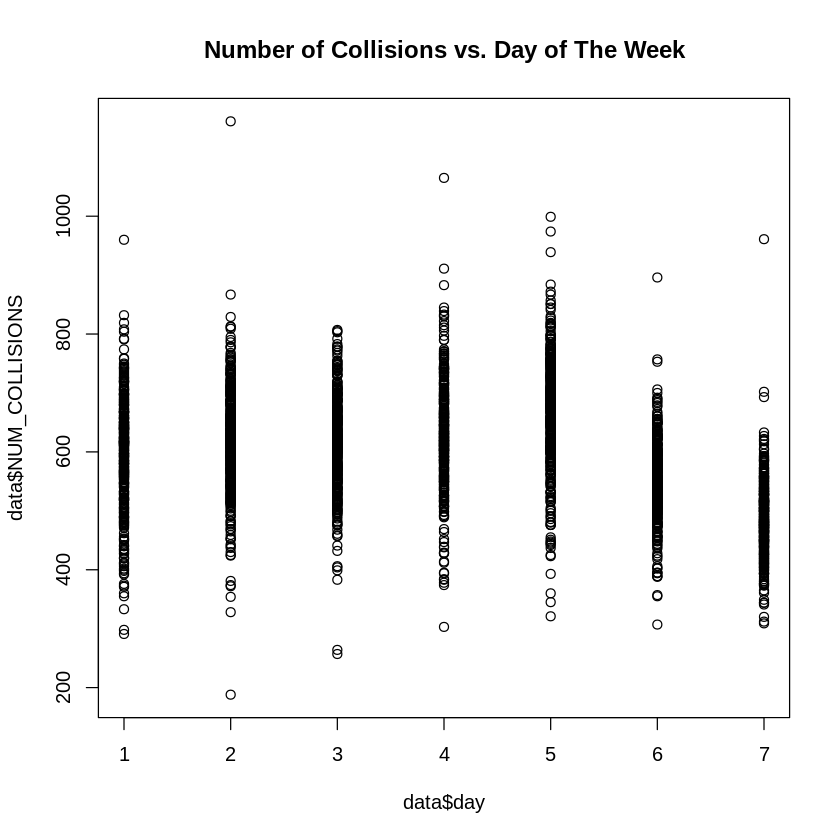

In [ ]:
plot(data$day, data$NUM_COLLISIONS, main = "Number of Collisions vs. Day of The Week")

From this, we can see that on Friday (day 5) there are slightly more collisions than on other days and that on Sunday (day 7) there are slightly fewer collisions. We can assume the reason for this is down to the number of cars on the road for these days, on Friday it's the end of a typical work week so more people could be going out for social activities increasing traffic on the road which would lead to a higher chance of collisions. For Sunday it is the same thing, people will be staying in as they'll have work on Monday resulting in less traffic on the roads meaning the chance for accidents to occur is less likely.

There are also a few outliers where there is significantly more or less which you can see via the circles, on a Tuesday (day 2) there was the most amount of collisions in a given day, perhaps there was a significant weather event during this time which leads to more accidents that day, further analysis will need to be done to delve into that.

But for now, let’s continue plotting. Let's plot the temperature to the number of collisions.

In [ ]:
library(lattice)

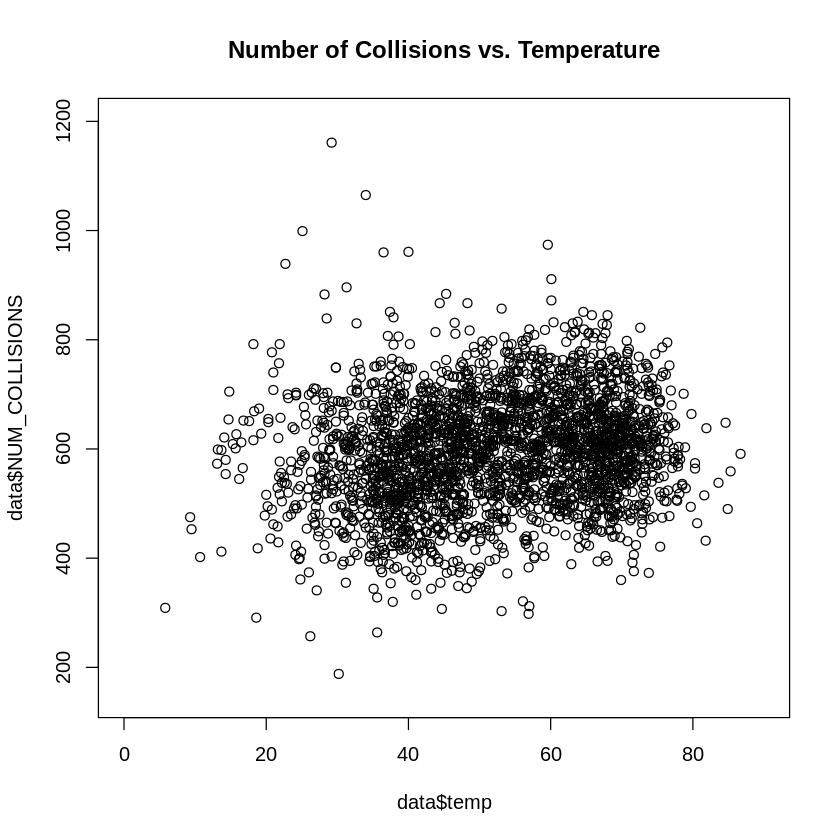

In [ ]:
plot(data$temp, data$NUM_COLLISIONS, main = "Number of Collisions vs. Temperature", xlim=c(0,90), ylim=c(150,1200))

From this, we can see that the Tuesday with the most collisions happened when the temperature was around 30F. This means it's around freezing temperatures which could have been a cause for the accidents, still further analysis will need to be done.

We can see though that most of the collisions happen around a fair range of temperatures from around 35-40F to 65F-70F with the big clusters being around these temperatures. This could indicate that temperature is a cause of collisions.

To further test this we can correlate the data to see if there is a strong correlation here.

In [ ]:
cor(data$temp, data$NUM_COLLISIONS)

[1] 0.1707529

This indicates a weak positive correlation between temperature and collisions, this could be due to the outliers in the data as the spread is not tight together and more lose, it also indicates that as the temperature goes up there are ever so slightly more collisions, due to this we can assume for now that temperature does not correlate to more or fewer collisions in New York City.

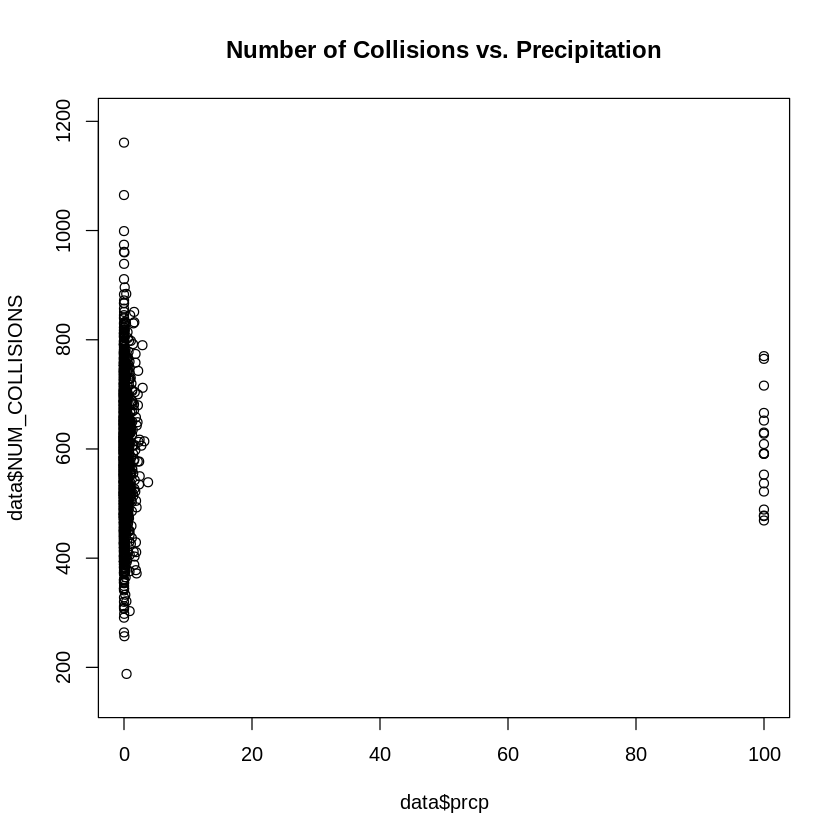

In [ ]:
plot(data$prcp, data$NUM_COLLISIONS, main = "Number of Collisions vs. Precipitation", xlim=c(0,100), ylim=c(150,1200))

We can see an issue here as some of the data is at 99.99 causing outliers and bad data and we should set 99.99 to 0 instead of removing it as there isn't a lot of data to begin with.

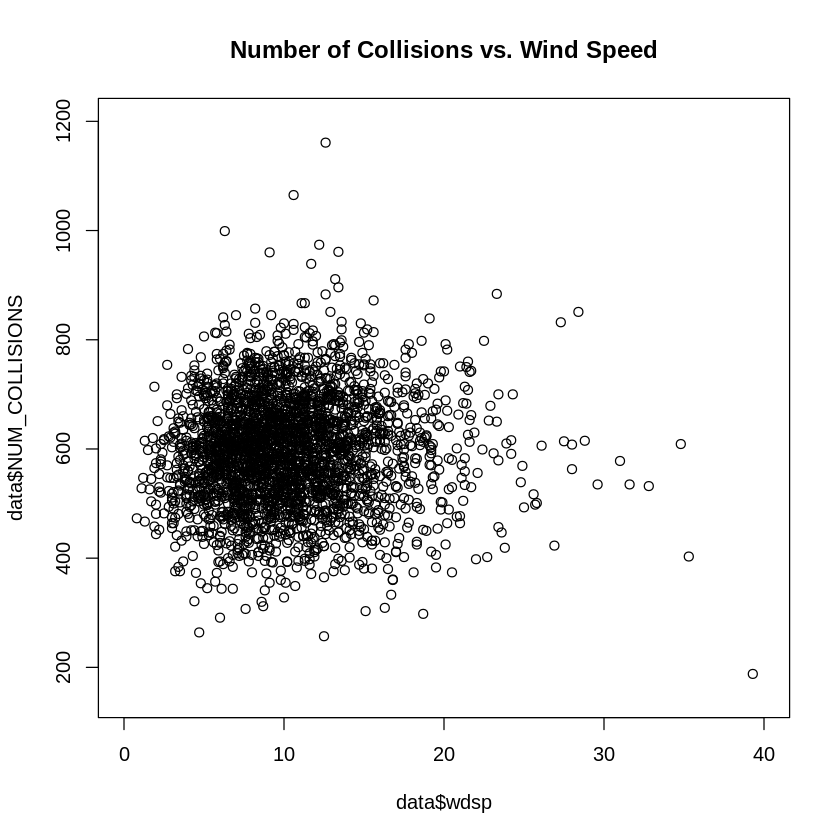

In [ ]:
plot(data$wdsp, data$NUM_COLLISIONS, main = "Number of Collisions vs. Wind Speed", xlim=c(0,40), ylim=c(150,1200))

In [ ]:
cor(data$wdsp, data$NUM_COLLISIONS)

[1] 0.0296208

Once again there is a slight positive linear relationship, but it does not appear to be something that correlates directly to collisions happening.

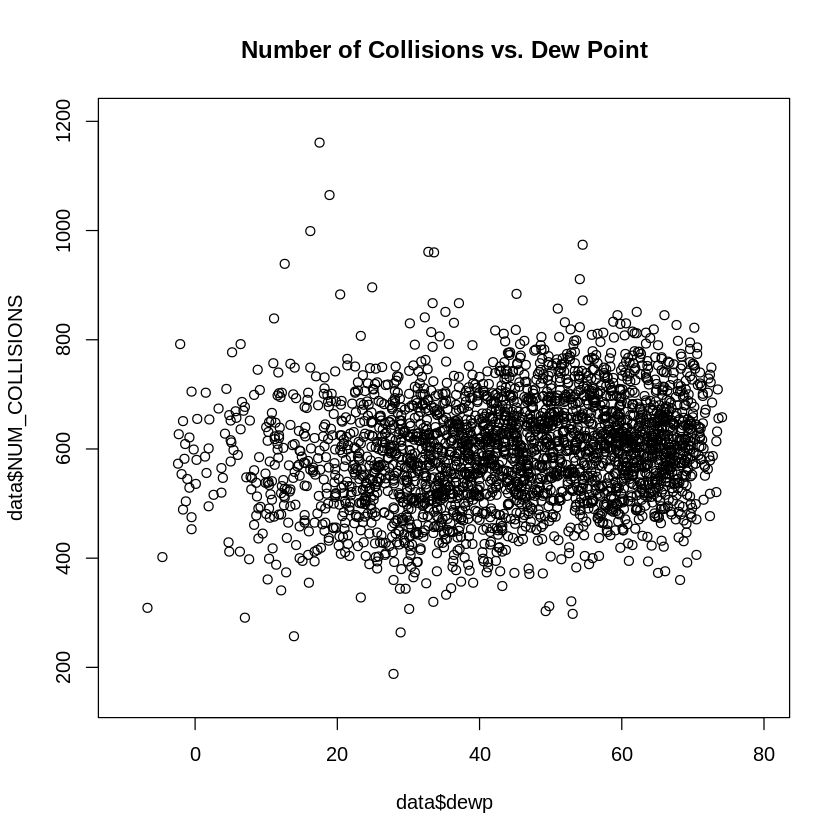

In [ ]:
plot(data$dewp, data$NUM_COLLISIONS, main = "Number of Collisions vs. Dew Point", xlim=c(-10,80), ylim=c(150,1200))

In [ ]:
cor(data$dewp, data$NUM_COLLISIONS)

[1] 0.02091211

Again, very slight positive linear relationship, but nothing promising here for a correlation to accidents.

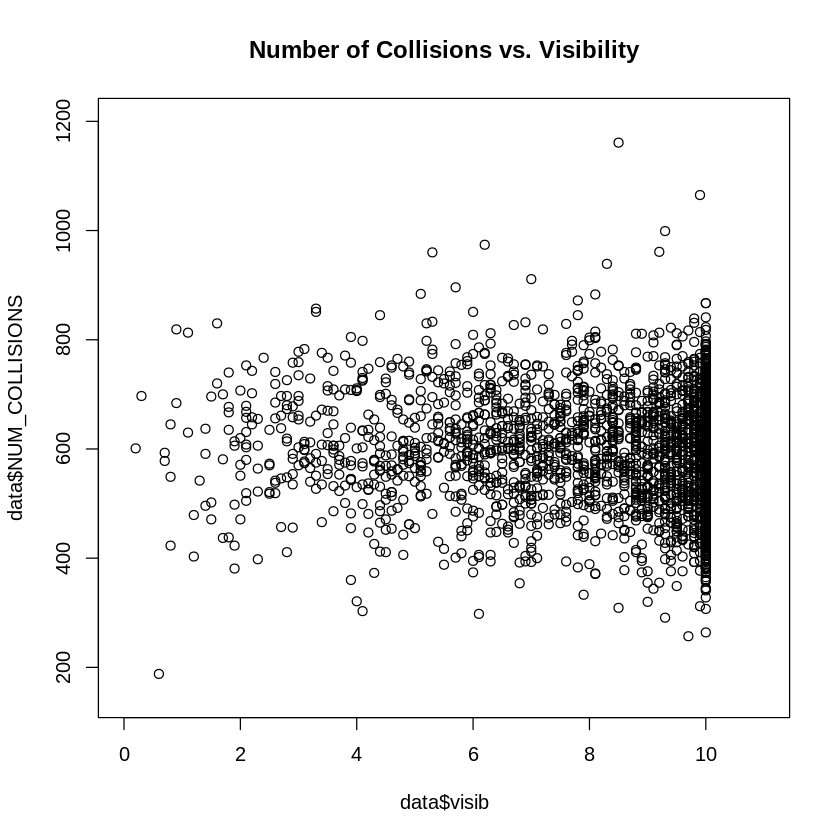

In [ ]:
plot(data$visib, data$NUM_COLLISIONS, main = "Number of Collisions vs. Visibility", xlim=c(0,11), ylim=c(150,1200))

In [ ]:
cor(data$visib, data$NUM_COLLISIONS)

[1] -0.07744534

Another variable with a very weak correlation, this one being a negative linear relationship indicating that while the visibility decreases slightly more accidents occur, but this alone still isn't enough to state it to be a contributing reason for more accidents.

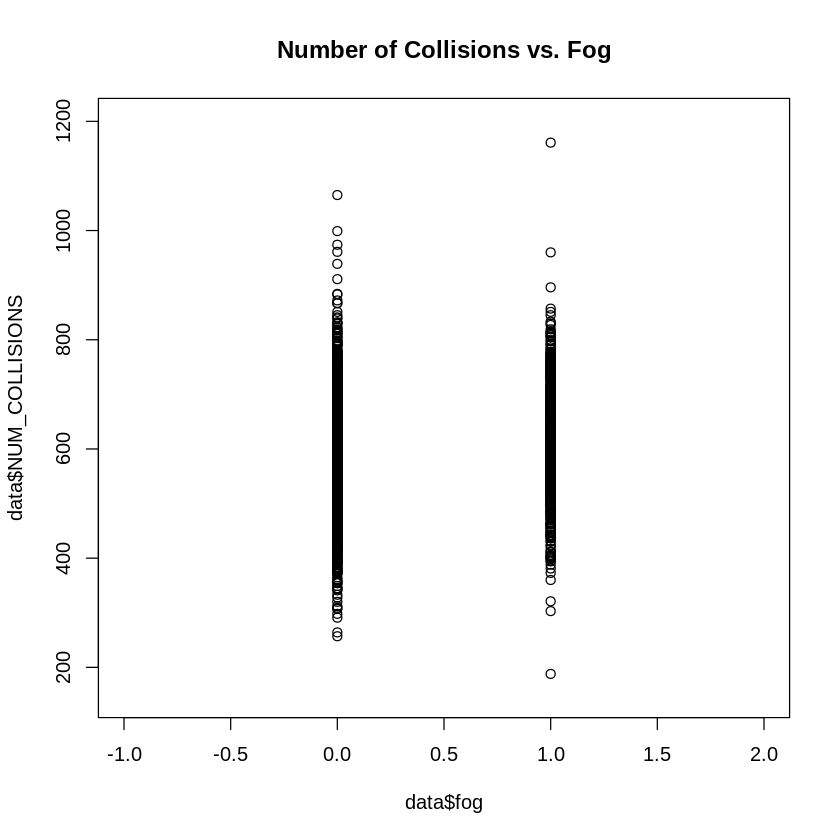

In [ ]:
plot(data$fog, data$NUM_COLLISIONS, main = "Number of Collisions vs. Fog", xlim=c(-1,2), ylim=c(150,1200))

In [ ]:
cor(data$fog, data$NUM_COLLISIONS)

[1] 0.08379334

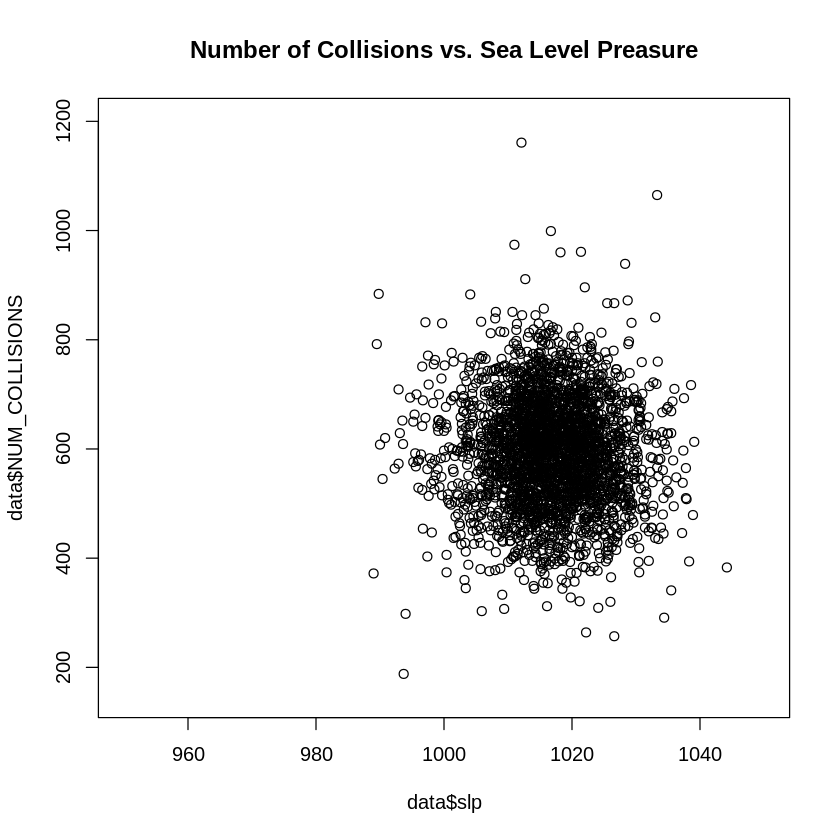

In [ ]:
plot(data$slp, data$NUM_COLLISIONS, main = "Number of Collisions vs. Sea Level Preasure", xlim=c(950,1050), ylim=c(150,1200))

In [ ]:
cor(data$slp, data$NUM_COLLISIONS)

[1] -0.01510926

Once again the data here is showing to be a negative linear relationship which indicates that it's not relevant here.

We can see a very weak linear relationship again.

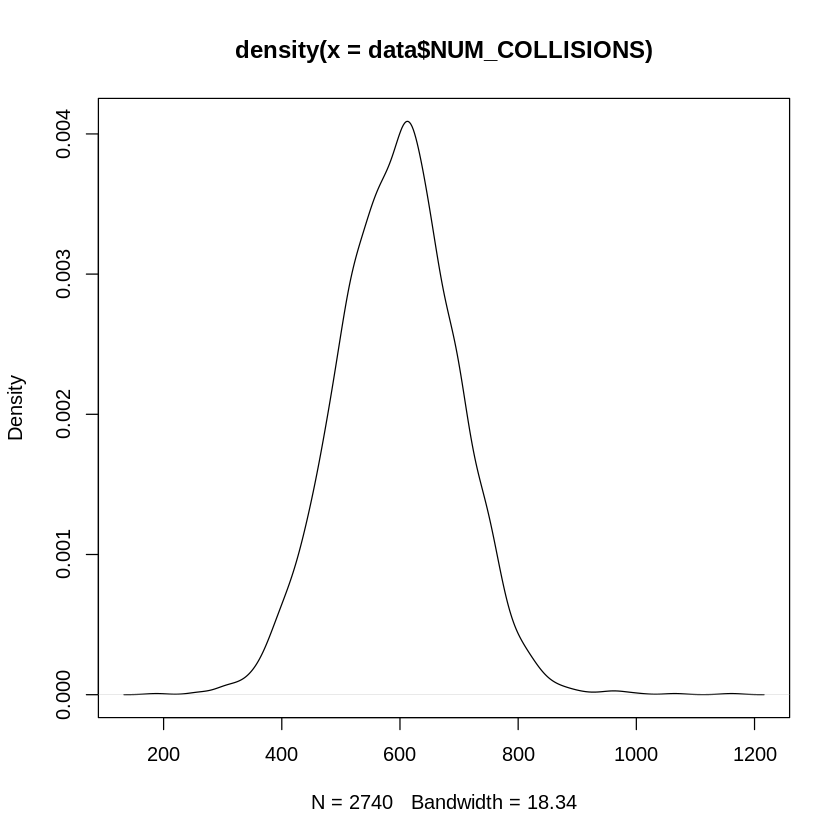

In [ ]:
plot(density(data$NUM_COLLISIONS))

We can see here that the density of collisions sits around 600 meaning that around 600 accidents happen per day and as the accidents decrease or increase from this point it becomes rarer indicating that more than 600 or less than 600 accidents per day is not the norm.

# **Regression Modeling**

**FOG**

In [ ]:
FOG_RESULTS <- lm(data$NUM_COLLISIONS ~ data$fog)
summary(FOG_RESULTS)


Call:
lm(formula = data$NUM_COLLISIONS ~ data$fog)

Residuals:
    Min      1Q  Median      3Q     Max 
-422.16  -68.75    1.84   65.25  550.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   590.75       2.20   268.5  < 2e-16 ***
data$fog       19.41       4.41     4.4 1.12e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 99.82 on 2738 degrees of freedom
Multiple R-squared:  0.007021,	Adjusted R-squared:  0.006659 
F-statistic: 19.36 on 1 and 2738 DF,  p-value: 1.124e-05


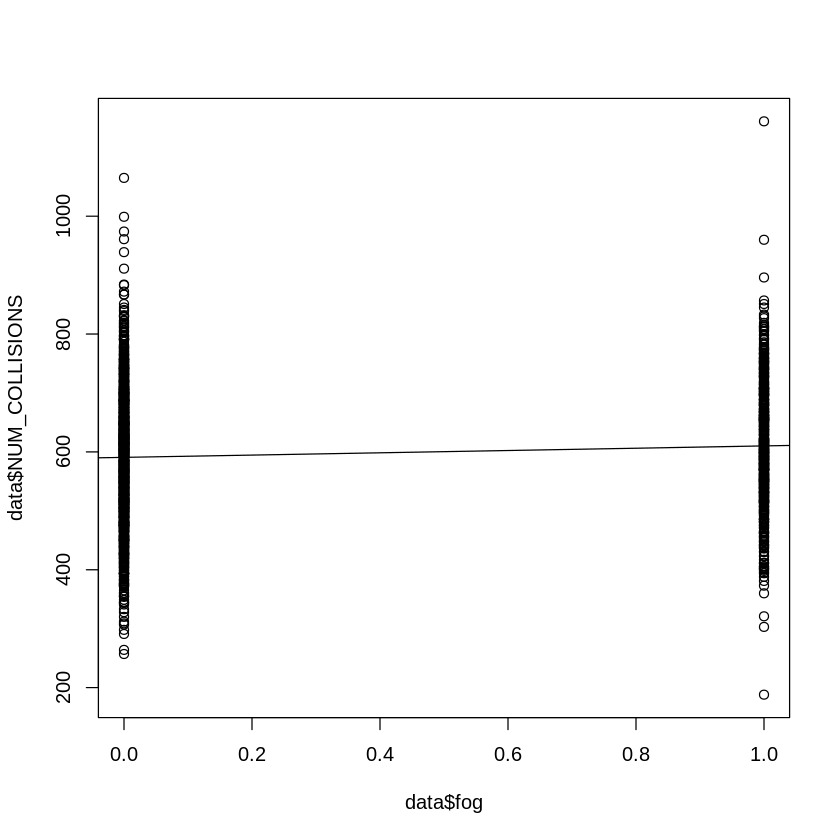

In [ ]:
plot(data$NUM_COLLISIONS ~ data$fog)
abline(lm(data$NUM_COLLISIONS ~ data$fog))

With fog being entered as a 1 or 0 it might make it difficult to use in linear regression. However, it can still be very important.

**VISIB**

In [ ]:
VISIB_RESULTS <- lm(data$NUM_COLLISIONS ~ data$visib)
summary(VISIB_RESULTS)


Call:
lm(formula = data$NUM_COLLISIONS ~ data$visib)

Residuals:
    Min      1Q  Median      3Q     Max 
-435.10  -68.10    1.95   64.38  566.03 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 625.2406     7.5415  82.907  < 2e-16 ***
data$visib   -3.5617     0.8763  -4.065 4.95e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 99.87 on 2738 degrees of freedom
Multiple R-squared:  0.005998,	Adjusted R-squared:  0.005635 
F-statistic: 16.52 on 1 and 2738 DF,  p-value: 4.947e-05


looking at the output of the summary when looking at the R-squared, F-statistic, and p-value it indicates that visibility has a statistically significant effect on the number of collisions, the effect size is small though. Visibility alone may not be a strong predictor of collision frequency.

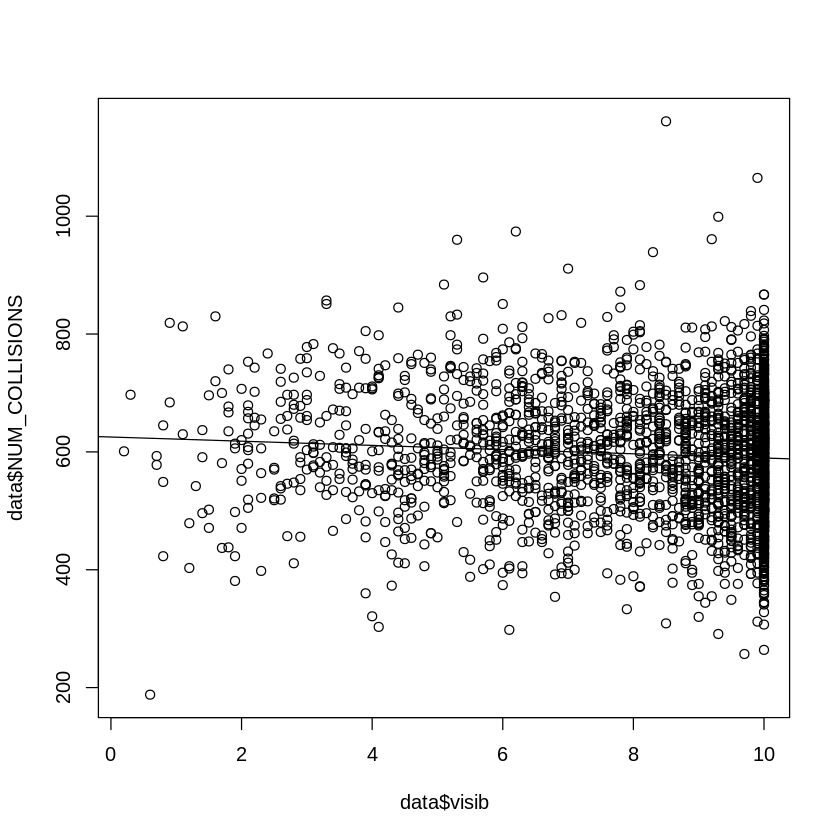

In [ ]:
plot(data$NUM_COLLISIONS ~ data$visib)
abline(lm(data$NUM_COLLISIONS ~ data$visib))

**WDSP**

In [ ]:
WDSP_RESULTS <- lm(data$NUM_COLLISIONS ~ data$wdsp)
summary(WDSP_RESULTS)


Call:
lm(formula = data$NUM_COLLISIONS ~ data$wdsp)

Residuals:
    Min      1Q  Median      3Q     Max 
-427.09  -68.83    2.54   64.72  563.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 588.6773     4.8479 121.429   <2e-16 ***
data$wdsp     0.6720     0.4333   1.551    0.121    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 100.1 on 2738 degrees of freedom
Multiple R-squared:  0.0008774,	Adjusted R-squared:  0.0005125 
F-statistic: 2.404 on 1 and 2738 DF,  p-value: 0.1211


The regression analysis reveals that wind speed does not have a statistically significant effect on the number of collisions, as indicated by a p-value of 0.121. The coefficient estimate suggests a slight positive relationship between wind speed and collisions. The low R-squared value further confirms that wind speed alone is not a strong predictor of collision frequency.

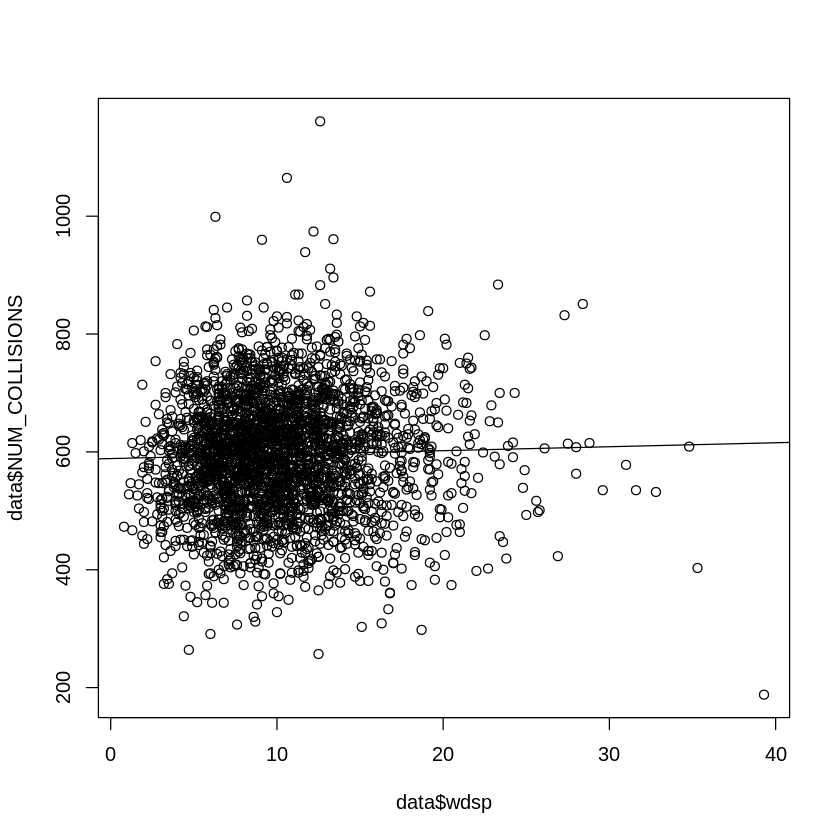

In [ ]:
plot(data$NUM_COLLISIONS ~ data$wdsp)
abline(lm(data$NUM_COLLISIONS ~ data$wdsp))

**MXPSD**

In [ ]:
MXPSD_RESULTS <- lm(data$NUM_COLLISIONS ~ data$mxpsd)
summary(MXPSD_RESULTS)


Call:
lm(formula = data$NUM_COLLISIONS ~ data$mxpsd)

Residuals:
    Min      1Q  Median      3Q     Max 
-409.50  -68.38    2.62   64.54  565.17 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 594.41708    2.18414 272.152   <2e-16 ***
data$mxpsd    0.06419    0.05792   1.108    0.268    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 100.1 on 2738 degrees of freedom
Multiple R-squared:  0.0004483,	Adjusted R-squared:  8.323e-05 
F-statistic: 1.228 on 1 and 2738 DF,  p-value: 0.2679


Similarly, to wind speed, maximum sustained wind speed also shows as not being statistically significant based on the p-value is 0.268 and with a very low R-squared value.

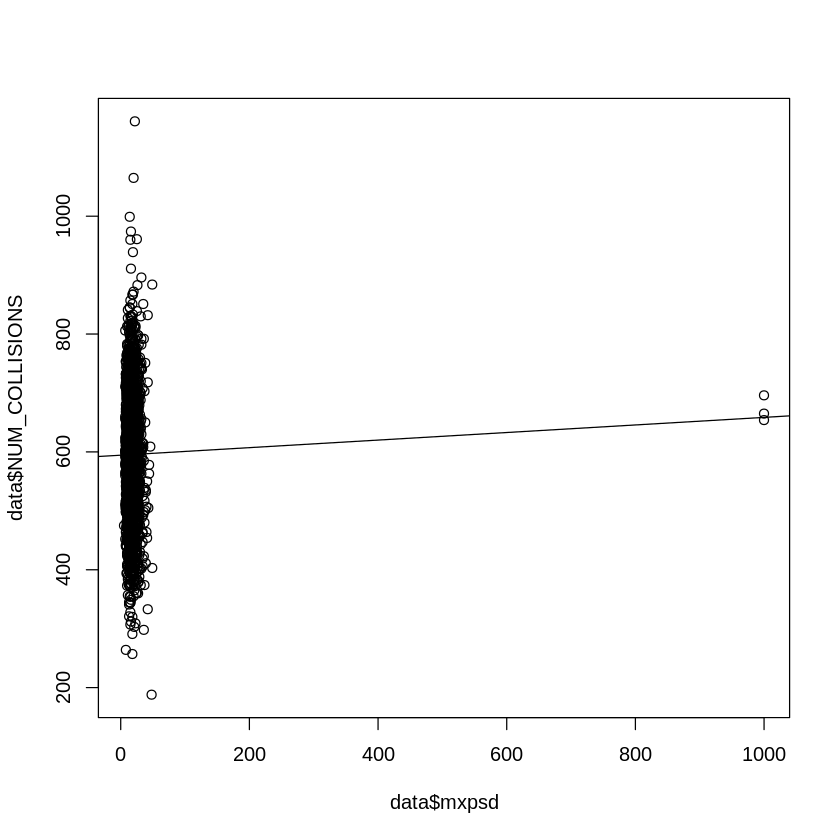

In [ ]:
plot(data$NUM_COLLISIONS ~ data$mxpsd)
abline(lm(data$NUM_COLLISIONS ~ data$mxpsd))

Some of the data for MXPSD could be outliers which could skew the data, to prevent this cleaning the data up would be a good start.

**GUST**

In [ ]:
GUST_RESULTS <- lm(data$NUM_COLLISIONS ~ data$gust)
summary(GUST_RESULTS)


Call:
lm(formula = data$NUM_COLLISIONS ~ data$gust)

Residuals:
    Min      1Q  Median      3Q     Max 
-405.12  -67.78    1.82   65.18  568.15 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.926e+02  2.460e+00 240.876   <2e-16 ***
data$gust   7.828e-03  4.095e-03   1.912    0.056 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 100.1 on 2738 degrees of freedom
Multiple R-squared:  0.001333,	Adjusted R-squared:  0.0009682 
F-statistic: 3.654 on 1 and 2738 DF,  p-value: 0.05602


The regression analysis suggests that wind gust alone may not have a statistically significant effect on the number of collisions, with a p-value of 0.056. However there appears to be a weak positive relationship between wind gust and collisions, but wind gust alone may not be a strong predictor of collision frequency.

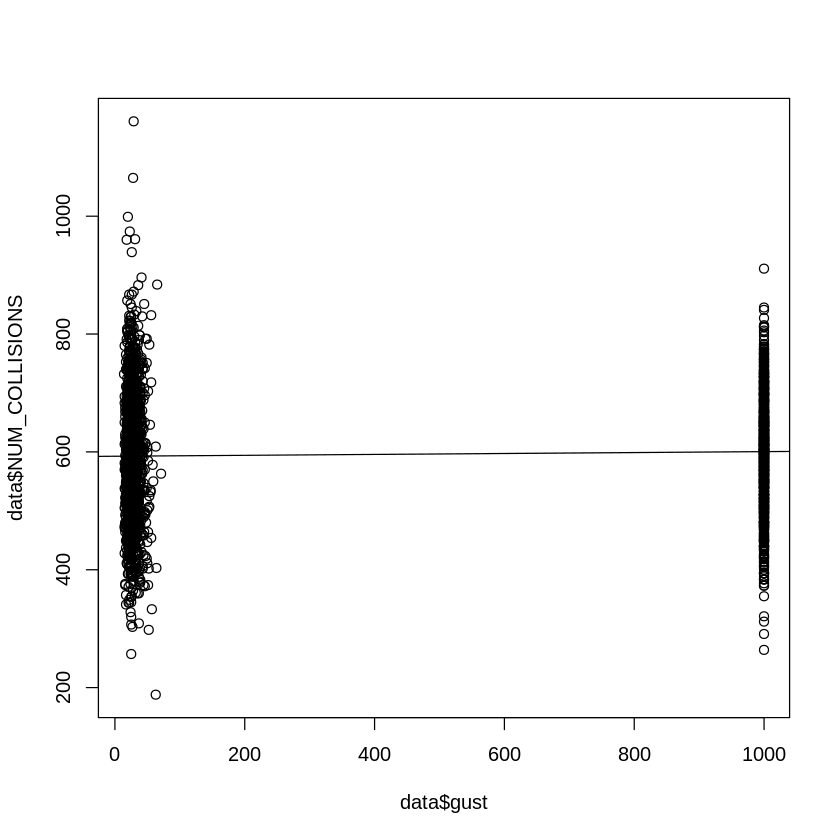

In [ ]:
plot(data$NUM_COLLISIONS ~ data$gust)
abline(lm(data$NUM_COLLISIONS ~ data$gust))

**TEMP**

In [ ]:
TEMP_RESULTS <- lm(data$NUM_COLLISIONS ~ data$temp)
summary(TEMP_RESULTS)


Call:
lm(formula = data$NUM_COLLISIONS ~ data$temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-381.60  -66.99    0.13   64.49  592.58 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 533.7974     7.0699  75.503   <2e-16 ***
data$temp     1.1856     0.1307   9.068   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 98.7 on 2738 degrees of freedom
Multiple R-squared:  0.02916,	Adjusted R-squared:  0.0288 
F-statistic: 82.23 on 1 and 2738 DF,  p-value: < 2.2e-16


As the p-value is essentially 0 we can see that temperature is of significant value when predicting collision frequency.

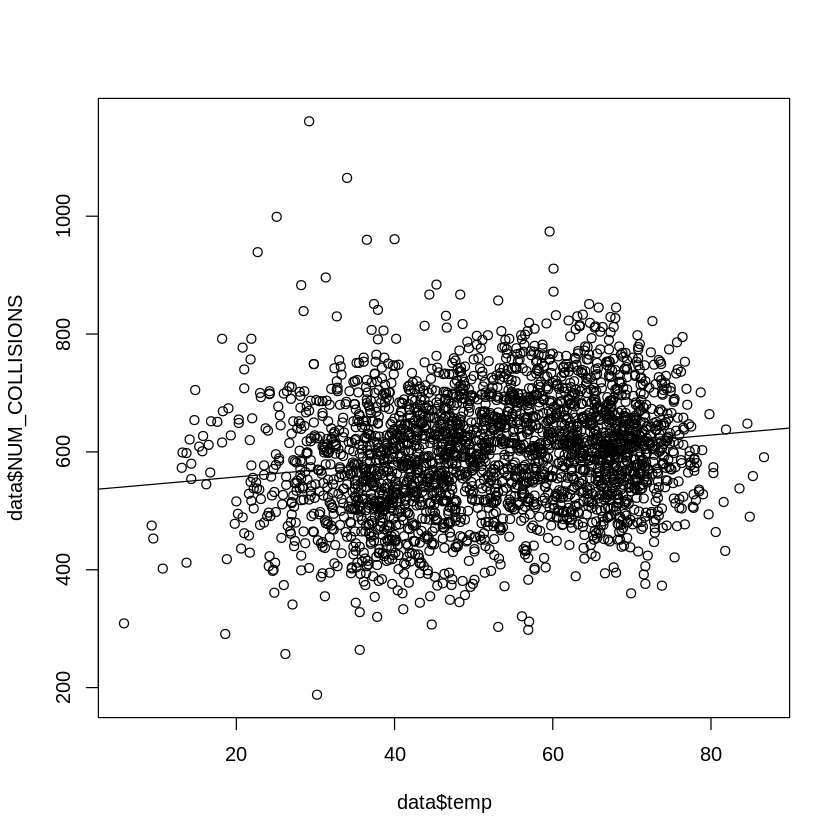

In [ ]:
plot(data$NUM_COLLISIONS ~ data$temp)
abline(lm(data$NUM_COLLISIONS ~ data$temp))

**MIN**

In [ ]:
MIN_RESULTS <- lm(data$NUM_COLLISIONS ~ data$min)
summary(MIN_RESULTS)


Call:
lm(formula = data$NUM_COLLISIONS ~ data$min)

Residuals:
    Min      1Q  Median      3Q     Max 
-380.71  -67.27   -0.42   64.44  589.99 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 544.6165     5.9741  91.163   <2e-16 ***
data$min      1.1475     0.1276   8.991   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 98.72 on 2738 degrees of freedom
Multiple R-squared:  0.02868,	Adjusted R-squared:  0.02833 
F-statistic: 80.84 on 1 and 2738 DF,  p-value: < 2.2e-16


As the p-value is essentially 0 we can see that minimum temperature is of significant value when predicting collision frequency.

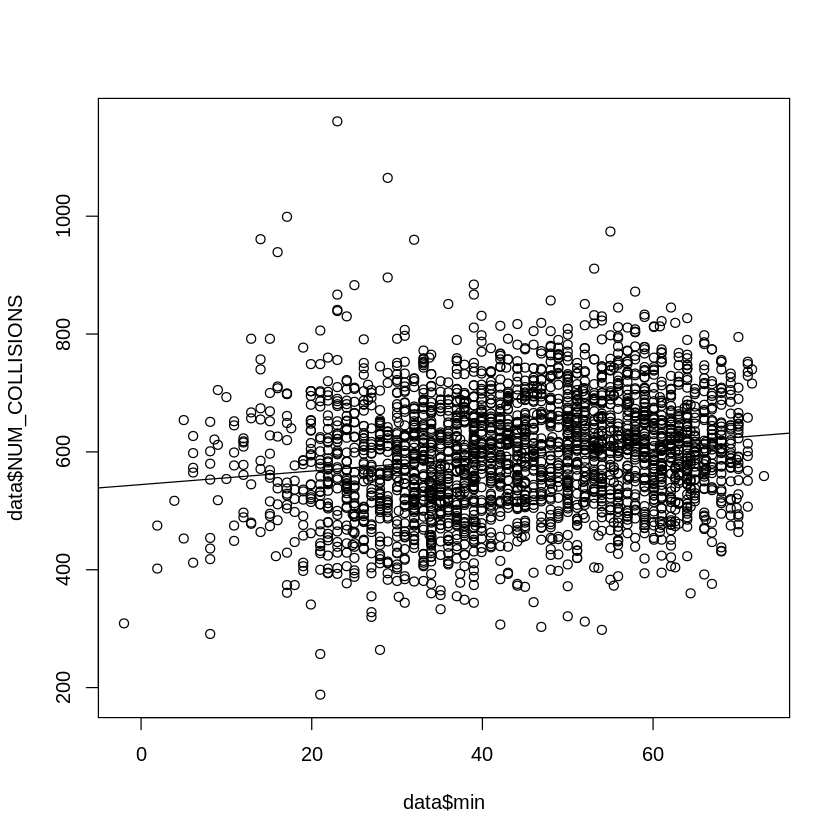

In [ ]:
plot(data$NUM_COLLISIONS ~ data$min)
abline(lm(data$NUM_COLLISIONS ~ data$min))

**MAX**

In [ ]:
MAX_RESULTS <- lm(data$NUM_COLLISIONS ~ data$max)
summary(MAX_RESULTS)


Call:
lm(formula = data$NUM_COLLISIONS ~ data$max)

Residuals:
    Min      1Q  Median      3Q     Max 
-376.08  -66.64    0.26   65.48  581.27 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 523.6958     8.0146  65.343   <2e-16 ***
data$max      1.1948     0.1295   9.229   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 98.65 on 2738 degrees of freedom
Multiple R-squared:  0.03017,	Adjusted R-squared:  0.02981 
F-statistic: 85.17 on 1 and 2738 DF,  p-value: < 2.2e-16


Similarly, to the temperature and the minimum temperature variables, maximum temperature also has a p-value which is basically 0 meaning max has a statistically significant predictor for collision frequency.

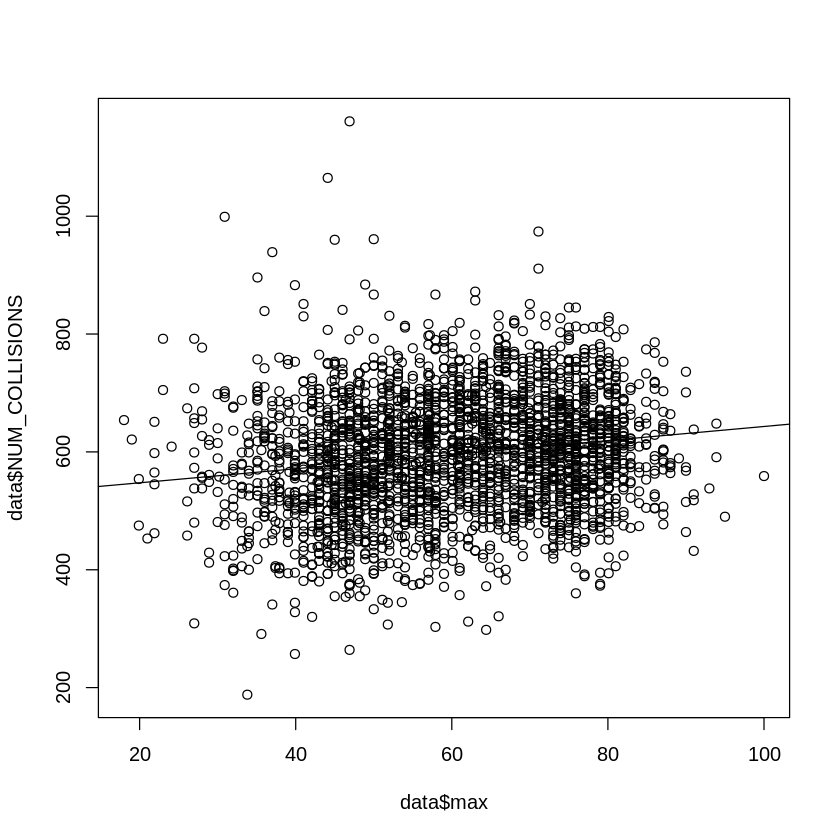

In [ ]:
plot(data$NUM_COLLISIONS ~ data$max)
abline(lm(data$NUM_COLLISIONS ~ data$max))

**SLP**

In [ ]:
SLP_RESULTS <- lm(data$NUM_COLLISIONS ~ data$slp)
summary(SLP_RESULTS)


Call:
lm(formula = data$NUM_COLLISIONS ~ data$slp)

Residuals:
    Min      1Q  Median      3Q     Max 
-407.82  -67.92    2.45   64.42  565.35 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 604.569757  11.523479  52.464   <2e-16 ***
data$slp     -0.008809   0.011140  -0.791    0.429    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 100.2 on 2738 degrees of freedom
Multiple R-squared:  0.0002283,	Adjusted R-squared:  -0.0001369 
F-statistic: 0.6252 on 1 and 2738 DF,  p-value: 0.4292


The p-value associated with the sea level pressure variable is approximately 0.429, indicating that it is not statistically significant in predicting collision frequency.

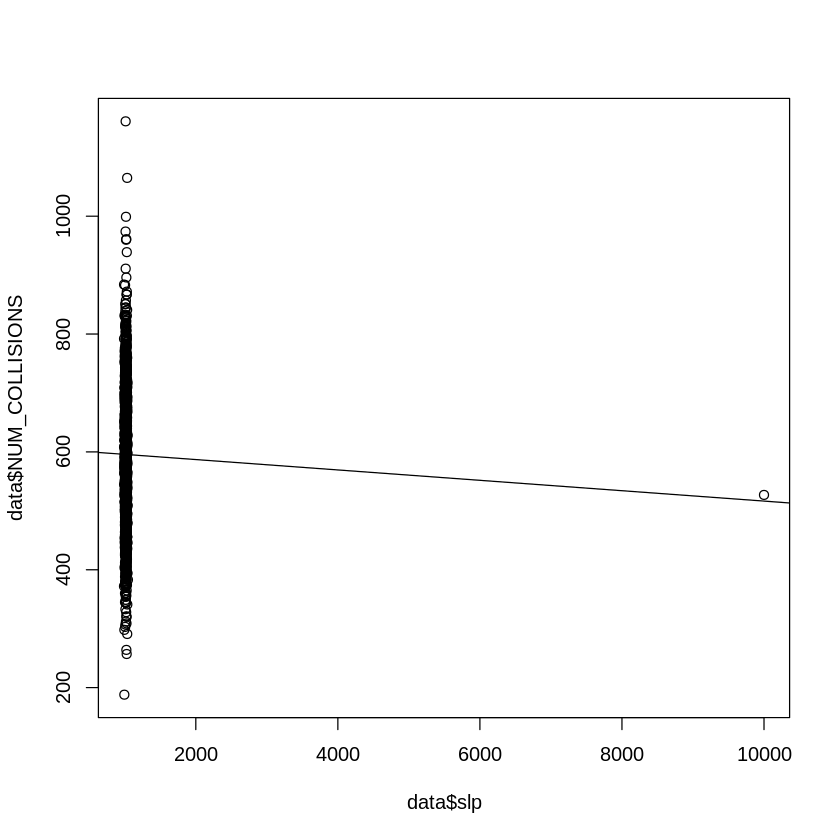

In [ ]:
plot(data$NUM_COLLISIONS ~ data$slp)
abline(lm(data$NUM_COLLISIONS ~ data$slp))

**PRCP**

In [ ]:
PRCP_RESULTS <- lm(data$NUM_COLLISIONS ~ data$prcp)
summary(PRCP_RESULTS)


Call:
lm(formula = data$NUM_COLLISIONS ~ data$prcp)

Residuals:
    Min      1Q  Median      3Q     Max 
-407.58  -68.58    2.42   64.42  565.42 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.956e+02  1.923e+00 309.788   <2e-16 ***
data$prcp   8.588e-03  2.370e-01   0.036    0.971    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 100.2 on 2738 degrees of freedom
Multiple R-squared:  4.796e-07,	Adjusted R-squared:  -0.0003648 
F-statistic: 0.001313 on 1 and 2738 DF,  p-value: 0.9711


The p-value associated with the precipitation variable is 0.971, which is much greater than the commonly used significance level of 0.05. Therefore, precipitation does not appear to have a statistically significant effect on collision frequency. However, it could still be a significant value when compared to other variables.

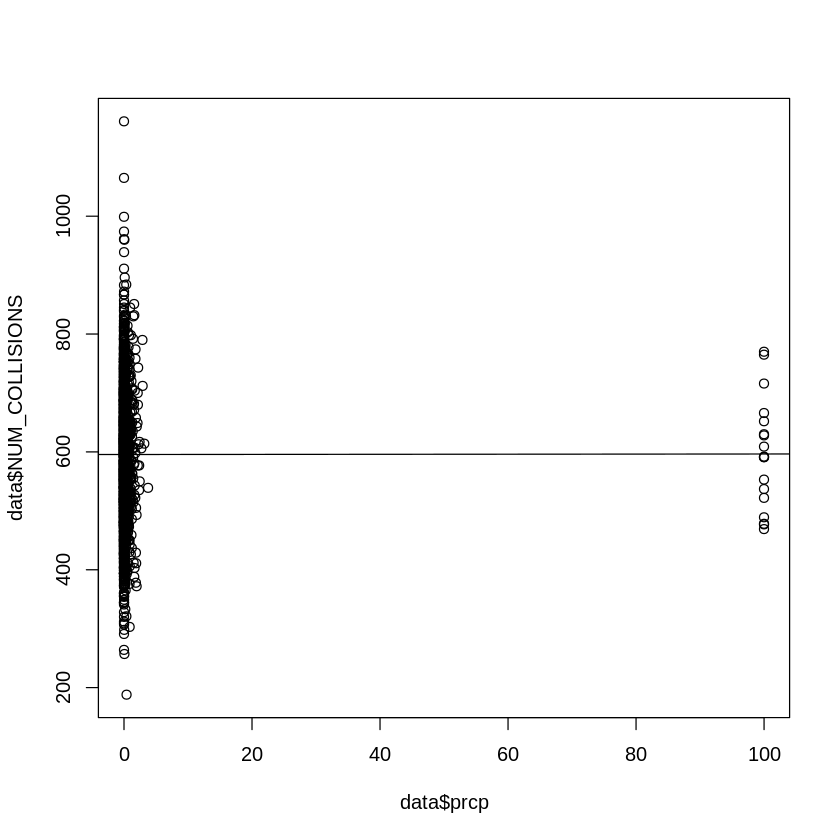

In [ ]:
plot(data$NUM_COLLISIONS ~ data$prcp)
abline(lm(data$NUM_COLLISIONS ~ data$prcp))

**DEWP**

In [ ]:
DEWP_RESULTS <- lm(data$NUM_COLLISIONS ~ data$dewp)
summary(DEWP_RESULTS)


Call:
lm(formula = data$NUM_COLLISIONS ~ data$dewp)

Residuals:
    Min      1Q  Median      3Q     Max 
-407.36  -68.34    2.50   64.45  565.75 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 595.05656    1.97311 301.582   <2e-16 ***
data$dewp     0.01097    0.01002   1.094    0.274    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 100.1 on 2738 degrees of freedom
Multiple R-squared:  0.0004373,	Adjusted R-squared:  7.225e-05 
F-statistic: 1.198 on 1 and 2738 DF,  p-value: 0.2738


The p-value associated with the dew point variable is 0.2738, which is greater than the commonly used significance level of 0.05. Therefore, dew point does not appear to have a statistically significant effect on collision frequency. However, it could still be a significant value when compared alongside other variables.

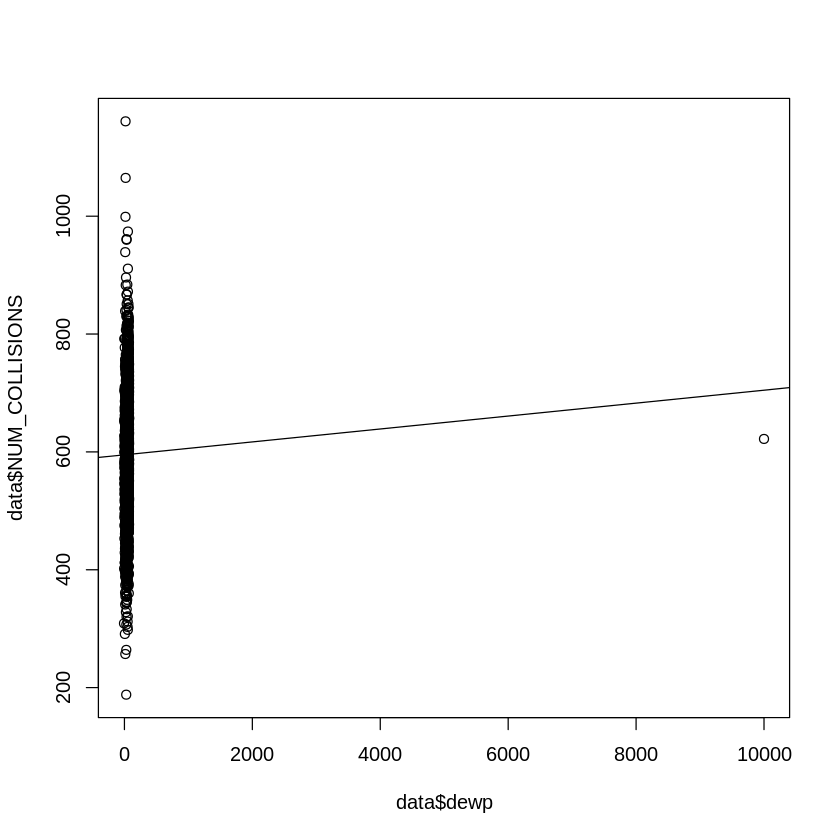

In [ ]:
plot(data$NUM_COLLISIONS ~ data$dewp)
abline(lm(data$NUM_COLLISIONS ~ data$dewp))

In summary from the regression analysis, we can see that there appears to be more significance in the temperature variables rather than the weather variables.

# **Correlation Graphing**

In [ ]:
library(lattice)

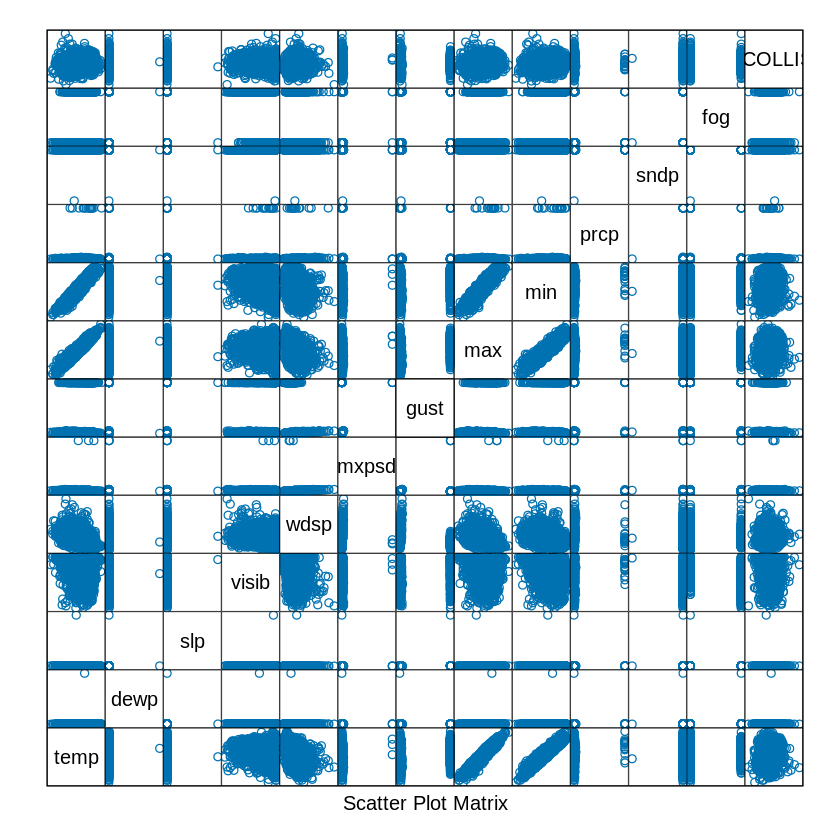

In [ ]:
# The text size is a little too big (not sure how to fix that, but it's NUM_COLLISIONS in the top right field)
splom(~data[c(6:18)], groups = NULL, data=data, axis.line.tck = 0, axis.text.alpha = 0)

Based on what we see here it corresponds with the regression models for temperature variables correlating while weather variables do not seem to show any correlation to the number of collisions.

We can make a correlation table to see if there is any other correlation with other variables that we can see.

In [ ]:
cor(data[, unlist(lapply(data, is.numeric))])

day           year          mo            da           
day             1.000000e+00 -0.0001288922  0.0009777773 -1.105668e-05
year           -1.288922e-04  1.0000000000 -0.0994233992 -1.455350e-03
mo              9.777773e-04 -0.0994233992  1.0000000000  1.088042e-02
da             -1.105668e-05 -0.0014553500  0.0108804218  1.000000e+00
temp           -7.947220e-03 -0.0791019155  0.3673599977  2.135598e-03
dewp            1.790141e-02  0.0188160728  0.0304261984  1.125106e-02
slp            -6.225723e-06 -0.0058715056  0.0322100006  3.200839e-02
visib           1.745458e-02 -0.0366096950  0.0709341902  2.311417e-02
wdsp           -5.952221e-03  0.1869709253 -0.1954138355 -1.239560e-02
mxpsd          -2.054916e-03 -0.0043124512  0.0026370158 -3.913333e-02
gust           -2.624610e-02  0.0582802728  0.0735568623 -8.230795e-03
max            -2.407994e-03 -0.0543935848  0.3625637494  5.836136e-03
min            -1.207065e-02 -0.0793179624  0.3478744443  3.001985e-03
prcp            4.978810e-03  0.0581109094  0.0151712801 -3.227484e-02
sndp           -9.556368e-03  0.0327749093 -0.0237439034  1.461614e-02
fog             2.341170e-02  0.0423693477 -0.0609721537 -2.426602e-02
NUM_COLLISIONS -2.858840e-01  0.2073884900  0.1122295189 -3.452074e-02
               temp         dewp          slp           visib      
day            -0.007947220  0.0179014057 -6.225723e-06  0.01745458
year           -0.079101916  0.0188160728 -5.871506e-03 -0.03660970
mo              0.367359998  0.0304261984  3.221000e-02  0.07093419
da              0.002135598  0.0112510583  3.200839e-02  0.02311417
temp            1.000000000  0.0954563489 -1.398354e-02 -0.18558216
dewp            0.095456349  1.0000000000 -9.034586e-04 -0.04370755
slp            -0.013983541 -0.0009034586  1.000000e+00  0.02409952
visib          -0.185582161 -0.0437075525  2.409952e-02  1.00000000
wdsp           -0.355929390 -0.0434557760 -9.982443e-03 -0.14653354
mxpsd          -0.043450720 -0.0051557455 -4.823745e-03 -0.02514733
gust            0.325201767  0.0149774091  3.393148e-02  0.03884077
max             0.971395059  0.0982175709 -2.110134e-02 -0.13236821
min             0.964545162  0.0925928523 -7.640562e-03 -0.22810260
prcp            0.068414158  0.0045782331 -4.985251e-03 -0.01814693
sndp            0.011681310  0.0022367560  4.359717e-04 -0.01293264
fog             0.222799663  0.0619192922 -1.990803e-02 -0.70634256
NUM_COLLISIONS  0.170752920  0.0209121118 -1.510926e-02 -0.07744534
               wdsp         mxpsd        gust         max          min         
day            -0.005952221 -0.002054916 -0.026246104 -0.002407994 -0.012070651
year            0.186970925 -0.004312451  0.058280273 -0.054393585 -0.079317962
mo             -0.195413836  0.002637016  0.073556862  0.362563749  0.347874444
da             -0.012395597 -0.039133333 -0.008230795  0.005836136  0.003001985
temp           -0.355929390 -0.043450720  0.325201767  0.971395059  0.964545162
dewp           -0.043455776 -0.005155745  0.014977409  0.098217571  0.092592852
slp            -0.009982443 -0.004823745  0.033931483 -0.021101336 -0.007640562
visib          -0.146533544 -0.025147327  0.038840766 -0.132368211 -0.228102601
wdsp            1.000000000  0.124705737 -0.543923916 -0.372758473 -0.295534088
mxpsd           0.124705737  1.000000000 -0.066648247 -0.033574130 -0.030729907
gust           -0.543923916 -0.066648247  1.000000000  0.343723324  0.274720109
max            -0.372758473 -0.033574130  0.343723324  1.000000000  0.929215105
min            -0.295534088 -0.030729907  0.274720109  0.929215105  1.000000000
prcp            0.033534755  0.005119035 -0.011715572  0.061283459  0.061411615
sndp            0.002941425 -0.007352395  0.013669931  0.009277854  0.010883012
fog            -0.060660432  0.026117091  0.086803001  0.207634360  0.241132401
NUM_COLLISIONS  0.029620800  0.021173126  0.036509489  0.173685633  0.169352102
               prcp          sndp          fog          NUM_COLLISIONS
da

From what I can tell the main correlating values to the number of collisions are the temperature variables, possibly the month and the year too. Further analysis should be done here to see if perhaps the time of year has an increase in collisions and if so, that could be a direct factor to why the temperature is a correlating factor too.

# **Further Plotting**

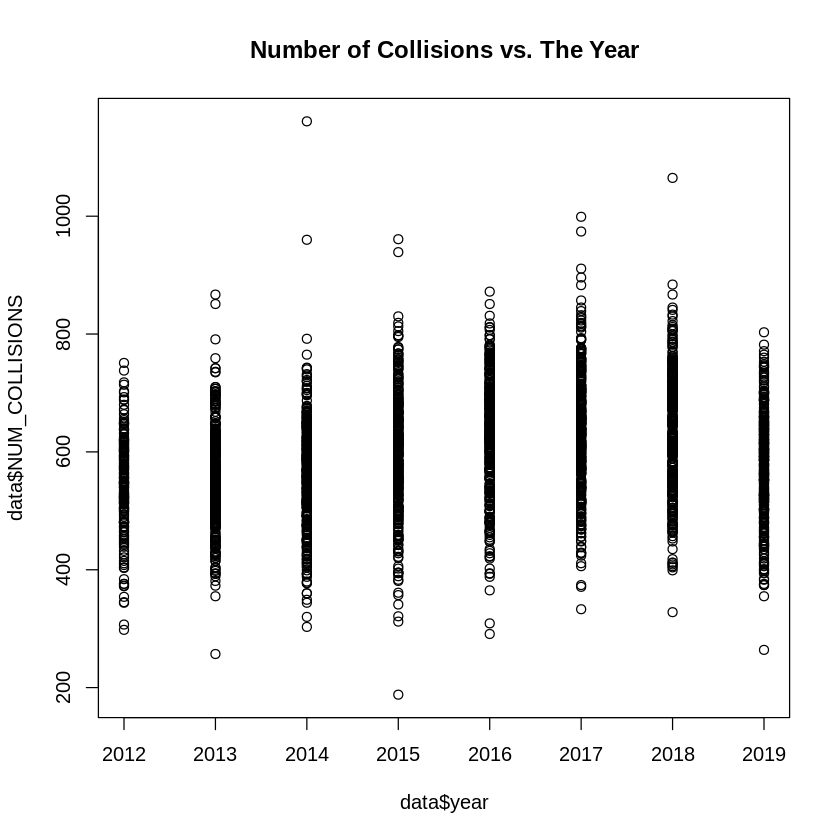

In [ ]:
plot(data$year, data$NUM_COLLISIONS, main = "Number of Collisions vs. The Year")

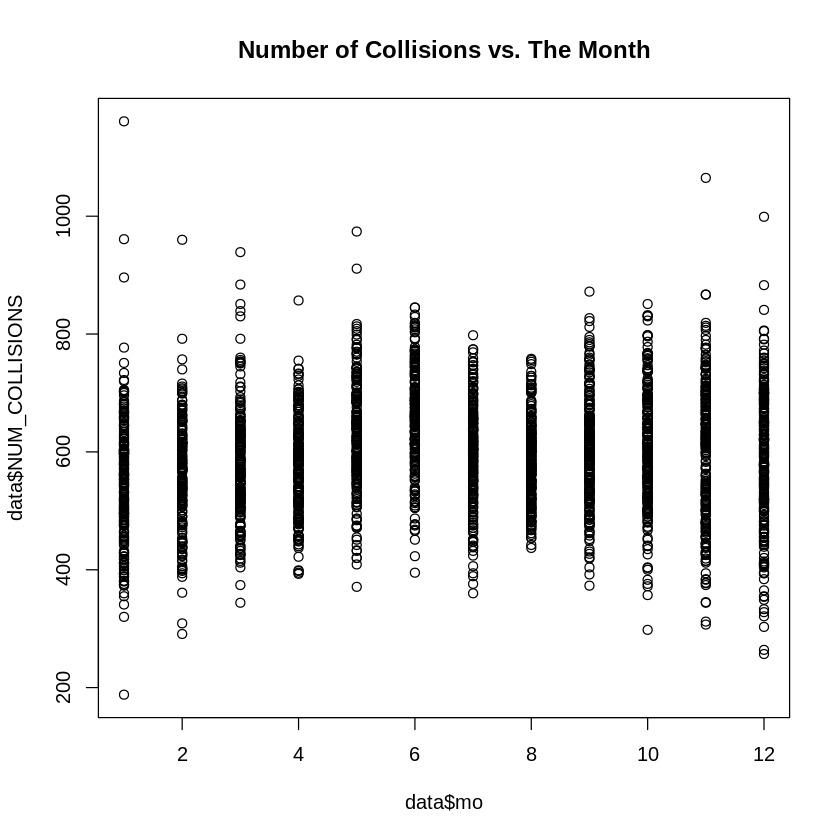

In [ ]:
plot(data$mo, data$NUM_COLLISIONS, main = "Number of Collisions vs. The Month")

Just from eyeballing these pieces of data, I would say that there tend to be more accidents in the winter seasonal months. It isn't much, but slightly more than the other months. I would say this indicates that in the winter season, there does appear to be more accidents but other factors than colder temperatures are likely to be a cause of this too.

# **Data Cleaning**

**Removing SNDP Variable**

Here I'll start cleaning up the bad data, such as removing the sndp variable due to it having such poor recorded data.

In [ ]:
# removes the sndp variable
clean_data <- subset(data, select = -c(sndp))

In [ ]:
# prints the new set of data
clean_data

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust  max 
1    2   2018 1   2 2018-01-02     14.7  2.0 1024.9 10.0  12.9 20.0   31.1 18  
2    1   2018 1   1 2018-01-01      9.5 -0.5 1022.2 10.0  15.0 18.1   25.1 21  
3    5   2014 1  24 2014-01-24     14.8 -0.5 1022.4 10.0  11.8 15.9   22.9 23  
4    4   2015 1   8 2015-01-08     13.1 -2.4 1022.7  9.9  14.8 21.0   29.9 27  
5    6   2018 1   6 2018-01-06     13.2 -0.2 1013.5 10.0  22.4 28.0   39.0 27  
6    3   2015 1   7 2015-01-07     22.6 10.2 1011.8  9.4  12.1 26.0   35.9 27  
7    4   2014 1  30 2014-01-30     22.0  5.8 1027.2 10.0   8.1 15.9   24.1 27  
8    3   2014 1  29 2014-01-29     20.3 10.4 1021.2  6.3   8.1 14.0  999.9 27  
9    2   2019 1  22 2019-01-22     15.8 -2.3 1026.7 10.0  17.6 27.0   36.9 28  
10   2   2015 1   6 2015-01-06     20.8  5.2 1025.2  8.8  10.3 21.0   31.1 28  
11   6   2013 1  26 2013-01-26     24.4 16.6 1016.4  8.6  10.5 15.9   19.0 28  
12   1   2017 1   9 2017-01-09     18.3  5.7 1035.5 10.0  11.0 18.1   22.9 28  
13   6   2015 1  10 2015-01-10     26.9 10.0 1025.0 10.0  10.2 17.1   22.0 30  
14   1   2013 1  28 2013-01-28     27.3 10.8 1028.9  8.8   7.4 14.0   20.0 32  
15   3   2014 1   1 2014-01-01     28.2 10.4 1025.6 10.0  11.3 21.0   28.9 32  
16   5   2018 1  26 2018-01-26     25.3  7.0 1035.0 10.0  14.4 21.0   31.1 32  
17   6   2019 1  12 2019-01-12     23.1  3.7 1029.0 10.0  12.9 19.0   28.0 32  
18   2   2013 1  22 2013-01-22     26.3 18.1 1011.1  6.5  10.8 20.0   26.0 32  
19   5   2018 1  19 2018-01-19     28.9 21.4 1014.3 10.0  10.5 15.0   21.0 34  
20   6   2015 1  31 2015-01-31     24.5 12.9 1006.9  7.8  20.3 27.0   36.9 34  
21   3   2014 1   8 2014-01-08     18.2  5.0 1028.1 10.0  12.0 17.1   26.0 34  
22   7   2017 1  15 2017-01-15     33.6 24.8 1025.3  9.0  10.8 19.0   22.9 36  
23   3   2014 1  22 2014-01-22     25.0 20.3 1001.1  1.9  25.7 35.9   46.0 36  
24   4   2015 1  29 2015-01-29     29.2 20.9 1022.9 10.0   8.5 13.0   20.0 36  
25   3   2013 1   9 2013-01-09     39.9 37.6 1026.2  6.8   5.3 11.1  999.9 46  
26   7   2018 1  28 2018-01-28     43.4 43.2 1025.3  4.4   9.5 18.1  999.9 46  
27   4   2016 1  28 2016-01-28     35.0 24.4 1016.1 10.0   4.3  8.9  999.9 46  
28   6   2018 1  27 2018-01-27     36.8 30.7 1034.3 10.0  12.2 18.1   24.1 46  
29   4   2014 1  16 2014-01-16     40.8 39.3 1010.6  4.6   5.9 11.1  999.9 46  
30   6   2017 1  21 2017-01-21     42.3 37.5 1011.3  6.7   7.5 17.1   20.0 46  
⋮    ⋮   ⋮    ⋮  ⋮  ⋮              ⋮    ⋮    ⋮      ⋮     ⋮    ⋮     ⋮     ⋮   
2711 1   2014 12 15 2014-12-15     37.8 31.6 1014.5  9.9   5.8 11.1  999.9 44.6
2712 6   2012 12 29 2012-12-29     32.5 26.2 1013.1  7.8   5.3 21.0   28.0 44.6
2713 4   2012 12 20 2012-12-20     39.8 29.0 1020.3 10.0   8.5 22.9   29.9 44.6
2714 7   2012 12 30 2012-12-30     32.4 21.1 1011.1  8.8  11.9 39.0   49.9 44.6
2715 6   2017 12 16 2017-12-16     30.9 24.3 1013.6  8.0  12.4 22.0   28.0 35.1
2716 6   2013 12 14 2013-12-14     26.9 15.8 1029.8  8.1  10.7 15.0   22.0 35.1
2717 1   2013 12 16 2013-12-16     32.0 15.5 1012.3 10.0  12.5 17.1   27.0 35.1
2718 7   2017 12 17 2017-12-17     27.6 13.8 1022.8 10.0  10.1 17.1   28.0 35.1
2719 5   2013 12 13 2013-12-13     28.1 12.0 1019.3  9.9  12.7 24.1   31.1 35.1
2720 7   2018 12 23 2018-12-23     36.7 23.9 1015.1 10.0  11.6 20.0   32.1 51.1
2721 3   2017 12 20 2017-12-20     44.3 31.7 1007.3  9.9  14.9 21.0   31.1 51.1
2722 1   2014 12 29 2014-12-29     41.2 27.8 1017.9  9.9   8.4 12.0   18.1 51.1
2723 7   2014 12 28 2014-12-28     47.0 43.2 1014.0  9.5  10.7 15.9   22.0 51.1
2724 6   2018 12 15 2018-12-15     46.1 44.8 1022.3  5.7   6.8 18.1   27.0 51.1
2725 2   2014 12 23 2014-12-23     47.4 44.2 1022.0  6.6  11.1 15.0   22.0 51.1
2726 2   2017 12 12 2017-12-12     42.6 38.1 1007.4  9.7  10.0 17.1   20.0 51.1
2727 7   2018 12 16 2018-12-16     43.8 37.8 1017.9  8.4  15.2 20.0   28.9 51.1
2728 2   2013 12 10 2013-12-10     38.8 35.1 1012.4  6.7   9.1 17.1   25.1 51.1
2729 

With that variable removed, cleaning up the rest of the data is the goal.

**Cleaning Gust Variable**

In [ ]:
clean_data$gust[clean_data$gust == 999.9] <- 0

In [ ]:
# prints the new set of data
clean_data

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max 
1    2   2018 1   2 2018-01-02     14.7  2.0 1024.9 10.0  12.9 20.0  31.1 18  
2    1   2018 1   1 2018-01-01      9.5 -0.5 1022.2 10.0  15.0 18.1  25.1 21  
3    5   2014 1  24 2014-01-24     14.8 -0.5 1022.4 10.0  11.8 15.9  22.9 23  
4    4   2015 1   8 2015-01-08     13.1 -2.4 1022.7  9.9  14.8 21.0  29.9 27  
5    6   2018 1   6 2018-01-06     13.2 -0.2 1013.5 10.0  22.4 28.0  39.0 27  
6    3   2015 1   7 2015-01-07     22.6 10.2 1011.8  9.4  12.1 26.0  35.9 27  
7    4   2014 1  30 2014-01-30     22.0  5.8 1027.2 10.0   8.1 15.9  24.1 27  
8    3   2014 1  29 2014-01-29     20.3 10.4 1021.2  6.3   8.1 14.0   0.0 27  
9    2   2019 1  22 2019-01-22     15.8 -2.3 1026.7 10.0  17.6 27.0  36.9 28  
10   2   2015 1   6 2015-01-06     20.8  5.2 1025.2  8.8  10.3 21.0  31.1 28  
11   6   2013 1  26 2013-01-26     24.4 16.6 1016.4  8.6  10.5 15.9  19.0 28  
12   1   2017 1   9 2017-01-09     18.3  5.7 1035.5 10.0  11.0 18.1  22.9 28  
13   6   2015 1  10 2015-01-10     26.9 10.0 1025.0 10.0  10.2 17.1  22.0 30  
14   1   2013 1  28 2013-01-28     27.3 10.8 1028.9  8.8   7.4 14.0  20.0 32  
15   3   2014 1   1 2014-01-01     28.2 10.4 1025.6 10.0  11.3 21.0  28.9 32  
16   5   2018 1  26 2018-01-26     25.3  7.0 1035.0 10.0  14.4 21.0  31.1 32  
17   6   2019 1  12 2019-01-12     23.1  3.7 1029.0 10.0  12.9 19.0  28.0 32  
18   2   2013 1  22 2013-01-22     26.3 18.1 1011.1  6.5  10.8 20.0  26.0 32  
19   5   2018 1  19 2018-01-19     28.9 21.4 1014.3 10.0  10.5 15.0  21.0 34  
20   6   2015 1  31 2015-01-31     24.5 12.9 1006.9  7.8  20.3 27.0  36.9 34  
21   3   2014 1   8 2014-01-08     18.2  5.0 1028.1 10.0  12.0 17.1  26.0 34  
22   7   2017 1  15 2017-01-15     33.6 24.8 1025.3  9.0  10.8 19.0  22.9 36  
23   3   2014 1  22 2014-01-22     25.0 20.3 1001.1  1.9  25.7 35.9  46.0 36  
24   4   2015 1  29 2015-01-29     29.2 20.9 1022.9 10.0   8.5 13.0  20.0 36  
25   3   2013 1   9 2013-01-09     39.9 37.6 1026.2  6.8   5.3 11.1   0.0 46  
26   7   2018 1  28 2018-01-28     43.4 43.2 1025.3  4.4   9.5 18.1   0.0 46  
27   4   2016 1  28 2016-01-28     35.0 24.4 1016.1 10.0   4.3  8.9   0.0 46  
28   6   2018 1  27 2018-01-27     36.8 30.7 1034.3 10.0  12.2 18.1  24.1 46  
29   4   2014 1  16 2014-01-16     40.8 39.3 1010.6  4.6   5.9 11.1   0.0 46  
30   6   2017 1  21 2017-01-21     42.3 37.5 1011.3  6.7   7.5 17.1  20.0 46  
⋮    ⋮   ⋮    ⋮  ⋮  ⋮              ⋮    ⋮    ⋮      ⋮     ⋮    ⋮     ⋮    ⋮   
2711 1   2014 12 15 2014-12-15     37.8 31.6 1014.5  9.9   5.8 11.1   0.0 44.6
2712 6   2012 12 29 2012-12-29     32.5 26.2 1013.1  7.8   5.3 21.0  28.0 44.6
2713 4   2012 12 20 2012-12-20     39.8 29.0 1020.3 10.0   8.5 22.9  29.9 44.6
2714 7   2012 12 30 2012-12-30     32.4 21.1 1011.1  8.8  11.9 39.0  49.9 44.6
2715 6   2017 12 16 2017-12-16     30.9 24.3 1013.6  8.0  12.4 22.0  28.0 35.1
2716 6   2013 12 14 2013-12-14     26.9 15.8 1029.8  8.1  10.7 15.0  22.0 35.1
2717 1   2013 12 16 2013-12-16     32.0 15.5 1012.3 10.0  12.5 17.1  27.0 35.1
2718 7   2017 12 17 2017-12-17     27.6 13.8 1022.8 10.0  10.1 17.1  28.0 35.1
2719 5   2013 12 13 2013-12-13     28.1 12.0 1019.3  9.9  12.7 24.1  31.1 35.1
2720 7   2018 12 23 2018-12-23     36.7 23.9 1015.1 10.0  11.6 20.0  32.1 51.1
2721 3   2017 12 20 2017-12-20     44.3 31.7 1007.3  9.9  14.9 21.0  31.1 51.1
2722 1   2014 12 29 2014-12-29     41.2 27.8 1017.9  9.9   8.4 12.0  18.1 51.1
2723 7   2014 12 28 2014-12-28     47.0 43.2 1014.0  9.5  10.7 15.9  22.0 51.1
2724 6   2018 12 15 2018-12-15     46.1 44.8 1022.3  5.7   6.8 18.1  27.0 51.1
2725 2   2014 12 23 2014-12-23     47.4 44.2 1022.0  6.6  11.1 15.0  22.0 51.1
2726 2   2017 12 12 2017-12-12     42.6 38.1 1007.4  9.7  10.0 17.1  20.0 51.1
2727 7   2018 12 16 2018-12-16     43.8 37.8 1017.9  8.4  15.2 20.0  28.9 51.1
2728 2   2013 12 10 2013-12-10     38.8 35.1 1012.4  6.7   9.1 17.1  25.1 51.1
2729 3   2017 12 13 2017-12-13     32.8 25.1  992.9  9.

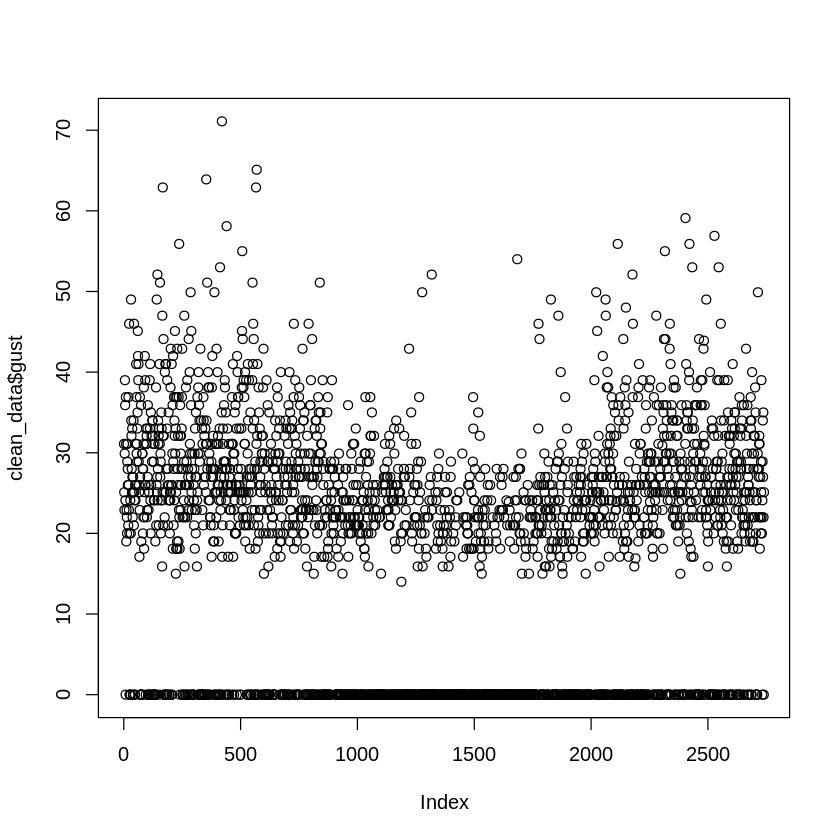

In [ ]:
plot(clean_data$gust)

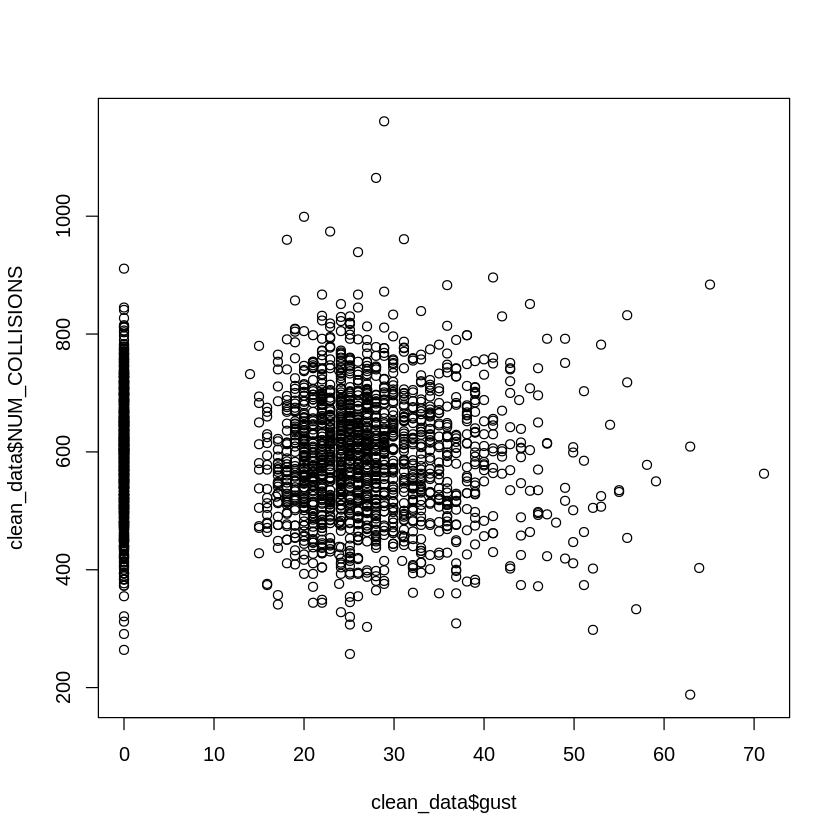

In [ ]:
plot(clean_data$gust, clean_data$NUM_COLLISIONS)

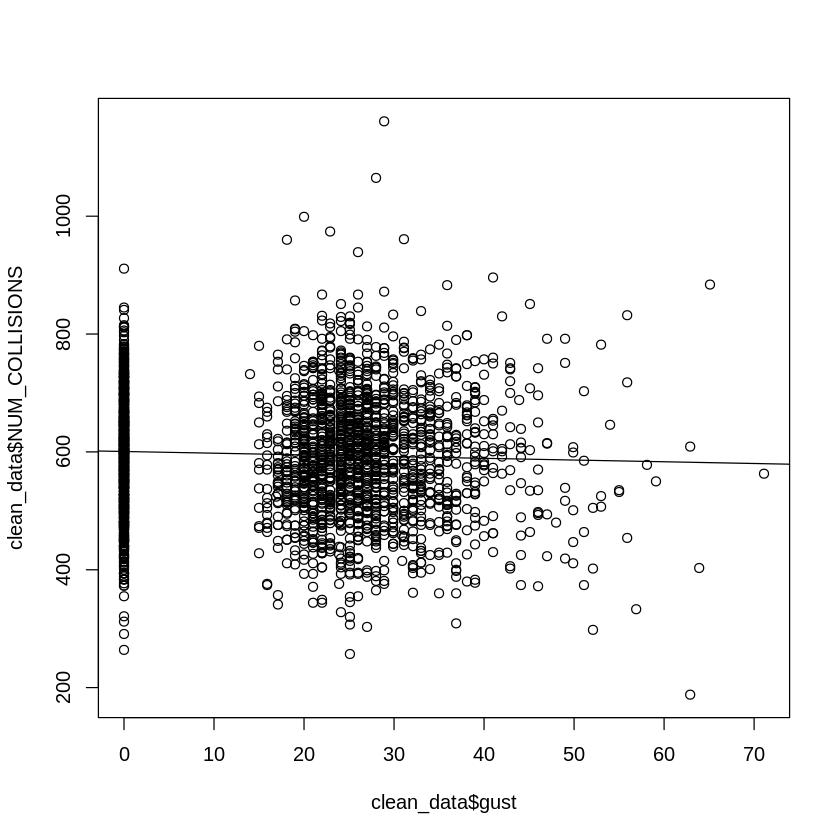

In [ ]:
plot(clean_data$NUM_COLLISIONS ~ clean_data$gust)
abline(lm(clean_data$NUM_COLLISIONS ~ clean_data$gust))

**UNCLEAN GUST DATA**

In [ ]:
GUST_RESULTS = lm(data$NUM_COLLISIONS ~ data$gust)
summary(GUST_RESULTS)


Call:
lm(formula = data$NUM_COLLISIONS ~ data$gust)

Residuals:
    Min      1Q  Median      3Q     Max 
-405.12  -67.78    1.82   65.18  568.15 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.926e+02  2.460e+00 240.876   <2e-16 ***
data$gust   7.828e-03  4.095e-03   1.912    0.056 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 100.1 on 2738 degrees of freedom
Multiple R-squared:  0.001333,	Adjusted R-squared:  0.0009682 
F-statistic: 3.654 on 1 and 2738 DF,  p-value: 0.05602


**CLEAN GUST DATA**

In [ ]:
CLEAN_GUST_RESULTS = lm(clean_data$NUM_COLLISIONS ~ clean_data$gust)
summary(CLEAN_GUST_RESULTS)


Call:
lm(formula = clean_data$NUM_COLLISIONS ~ clean_data$gust)

Residuals:
    Min      1Q  Median      3Q     Max 
-394.37  -68.44    1.62   65.04  568.74 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     600.6693     3.0048 199.904   <2e-16 ***
clean_data$gust  -0.2909     0.1326  -2.194   0.0284 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 100.1 on 2738 degrees of freedom
Multiple R-squared:  0.001754,	Adjusted R-squared:  0.00139 
F-statistic: 4.812 on 1 and 2738 DF,  p-value: 0.02835


The p-value decreased from 0.056 to 0.028. This change indicates a more significant relationship between gust and collision frequency in the regression model, making the gust variable a more valuable predictor than it was before.

**Cleaning PRCP Variable**

In [ ]:
clean_data$prcp[clean_data$prcp == 99.99] <- 0

In [ ]:
# prints the new set of data
clean_data

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max 
1    2   2018 1   2 2018-01-02     14.7  2.0 1024.9 10.0  12.9 20.0  31.1 18  
2    1   2018 1   1 2018-01-01      9.5 -0.5 1022.2 10.0  15.0 18.1  25.1 21  
3    5   2014 1  24 2014-01-24     14.8 -0.5 1022.4 10.0  11.8 15.9  22.9 23  
4    4   2015 1   8 2015-01-08     13.1 -2.4 1022.7  9.9  14.8 21.0  29.9 27  
5    6   2018 1   6 2018-01-06     13.2 -0.2 1013.5 10.0  22.4 28.0  39.0 27  
6    3   2015 1   7 2015-01-07     22.6 10.2 1011.8  9.4  12.1 26.0  35.9 27  
7    4   2014 1  30 2014-01-30     22.0  5.8 1027.2 10.0   8.1 15.9  24.1 27  
8    3   2014 1  29 2014-01-29     20.3 10.4 1021.2  6.3   8.1 14.0   0.0 27  
9    2   2019 1  22 2019-01-22     15.8 -2.3 1026.7 10.0  17.6 27.0  36.9 28  
10   2   2015 1   6 2015-01-06     20.8  5.2 1025.2  8.8  10.3 21.0  31.1 28  
11   6   2013 1  26 2013-01-26     24.4 16.6 1016.4  8.6  10.5 15.9  19.0 28  
12   1   2017 1   9 2017-01-09     18.3  5.7 1035.5 10.0  11.0 18.1  22.9 28  
13   6   2015 1  10 2015-01-10     26.9 10.0 1025.0 10.0  10.2 17.1  22.0 30  
14   1   2013 1  28 2013-01-28     27.3 10.8 1028.9  8.8   7.4 14.0  20.0 32  
15   3   2014 1   1 2014-01-01     28.2 10.4 1025.6 10.0  11.3 21.0  28.9 32  
16   5   2018 1  26 2018-01-26     25.3  7.0 1035.0 10.0  14.4 21.0  31.1 32  
17   6   2019 1  12 2019-01-12     23.1  3.7 1029.0 10.0  12.9 19.0  28.0 32  
18   2   2013 1  22 2013-01-22     26.3 18.1 1011.1  6.5  10.8 20.0  26.0 32  
19   5   2018 1  19 2018-01-19     28.9 21.4 1014.3 10.0  10.5 15.0  21.0 34  
20   6   2015 1  31 2015-01-31     24.5 12.9 1006.9  7.8  20.3 27.0  36.9 34  
21   3   2014 1   8 2014-01-08     18.2  5.0 1028.1 10.0  12.0 17.1  26.0 34  
22   7   2017 1  15 2017-01-15     33.6 24.8 1025.3  9.0  10.8 19.0  22.9 36  
23   3   2014 1  22 2014-01-22     25.0 20.3 1001.1  1.9  25.7 35.9  46.0 36  
24   4   2015 1  29 2015-01-29     29.2 20.9 1022.9 10.0   8.5 13.0  20.0 36  
25   3   2013 1   9 2013-01-09     39.9 37.6 1026.2  6.8   5.3 11.1   0.0 46  
26   7   2018 1  28 2018-01-28     43.4 43.2 1025.3  4.4   9.5 18.1   0.0 46  
27   4   2016 1  28 2016-01-28     35.0 24.4 1016.1 10.0   4.3  8.9   0.0 46  
28   6   2018 1  27 2018-01-27     36.8 30.7 1034.3 10.0  12.2 18.1  24.1 46  
29   4   2014 1  16 2014-01-16     40.8 39.3 1010.6  4.6   5.9 11.1   0.0 46  
30   6   2017 1  21 2017-01-21     42.3 37.5 1011.3  6.7   7.5 17.1  20.0 46  
⋮    ⋮   ⋮    ⋮  ⋮  ⋮              ⋮    ⋮    ⋮      ⋮     ⋮    ⋮     ⋮    ⋮   
2711 1   2014 12 15 2014-12-15     37.8 31.6 1014.5  9.9   5.8 11.1   0.0 44.6
2712 6   2012 12 29 2012-12-29     32.5 26.2 1013.1  7.8   5.3 21.0  28.0 44.6
2713 4   2012 12 20 2012-12-20     39.8 29.0 1020.3 10.0   8.5 22.9  29.9 44.6
2714 7   2012 12 30 2012-12-30     32.4 21.1 1011.1  8.8  11.9 39.0  49.9 44.6
2715 6   2017 12 16 2017-12-16     30.9 24.3 1013.6  8.0  12.4 22.0  28.0 35.1
2716 6   2013 12 14 2013-12-14     26.9 15.8 1029.8  8.1  10.7 15.0  22.0 35.1
2717 1   2013 12 16 2013-12-16     32.0 15.5 1012.3 10.0  12.5 17.1  27.0 35.1
2718 7   2017 12 17 2017-12-17     27.6 13.8 1022.8 10.0  10.1 17.1  28.0 35.1
2719 5   2013 12 13 2013-12-13     28.1 12.0 1019.3  9.9  12.7 24.1  31.1 35.1
2720 7   2018 12 23 2018-12-23     36.7 23.9 1015.1 10.0  11.6 20.0  32.1 51.1
2721 3   2017 12 20 2017-12-20     44.3 31.7 1007.3  9.9  14.9 21.0  31.1 51.1
2722 1   2014 12 29 2014-12-29     41.2 27.8 1017.9  9.9   8.4 12.0  18.1 51.1
2723 7   2014 12 28 2014-12-28     47.0 43.2 1014.0  9.5  10.7 15.9  22.0 51.1
2724 6   2018 12 15 2018-12-15     46.1 44.8 1022.3  5.7   6.8 18.1  27.0 51.1
2725 2   2014 12 23 2014-12-23     47.4 44.2 1022.0  6.6  11.1 15.0  22.0 51.1
2726 2   2017 12 12 2017-12-12     42.6 38.1 1007.4  9.7  10.0 17.1  20.0 51.1
2727 7   2018 12 16 2018-12-16     43.8 37.8 1017.9  8.4  15.2 20.0  28.9 51.1
2728 2   2013 12 10 2013-12-10     38.8 35.1 1012.4  6.7   9.1 17.1  25.1 51.1
2729 3   2017 12 13 2017-12-13     32.8 25.1  992.9  9.

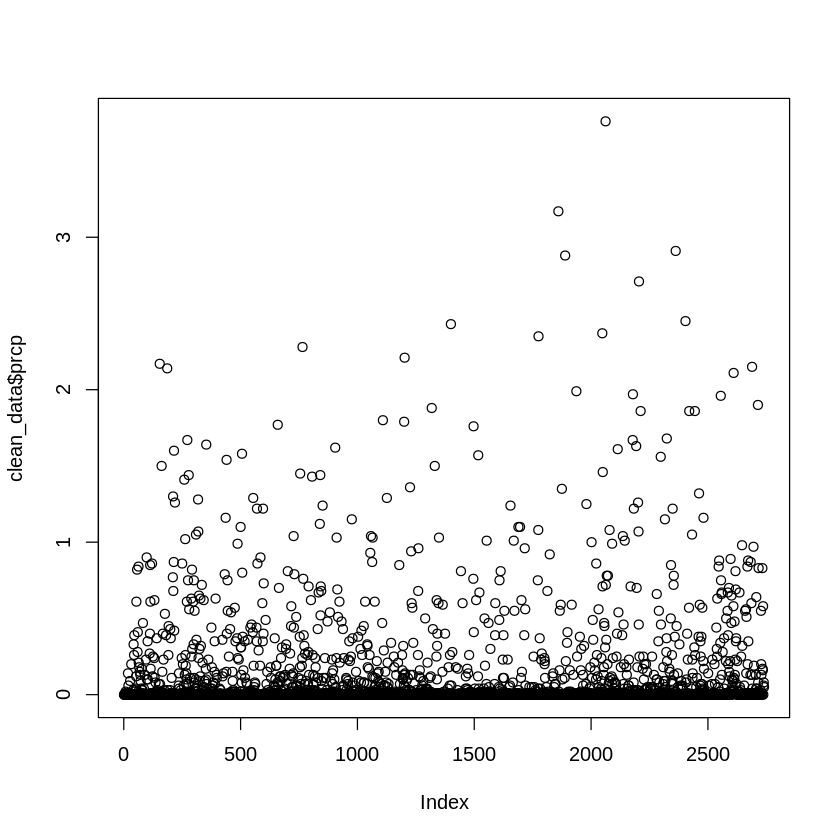

In [ ]:
plot(clean_data$prcp)

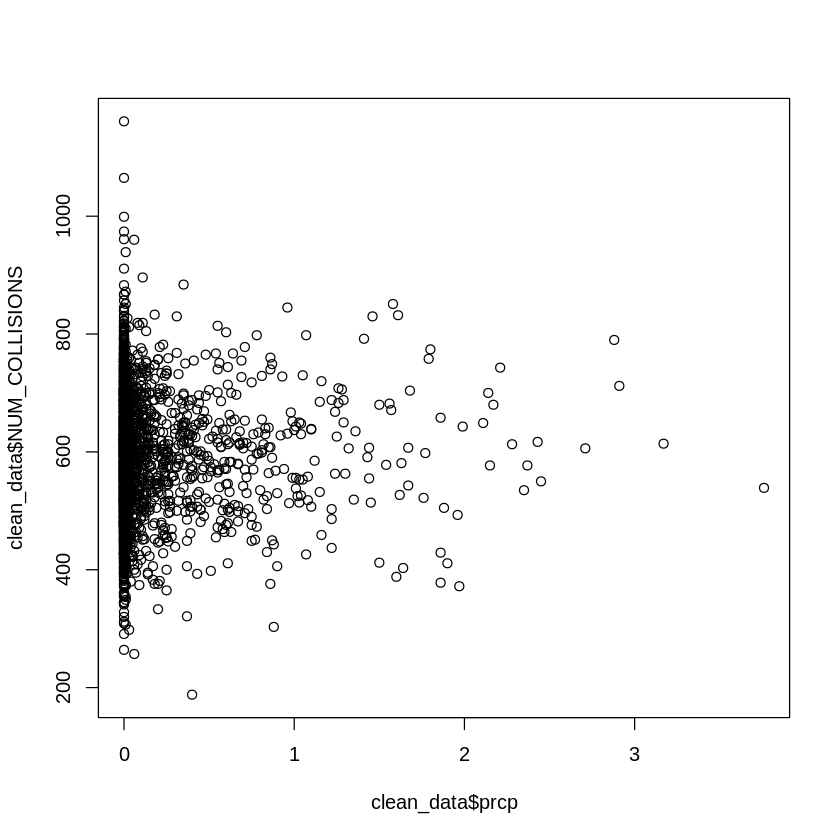

In [ ]:
plot(clean_data$prcp, clean_data$NUM_COLLISIONS)

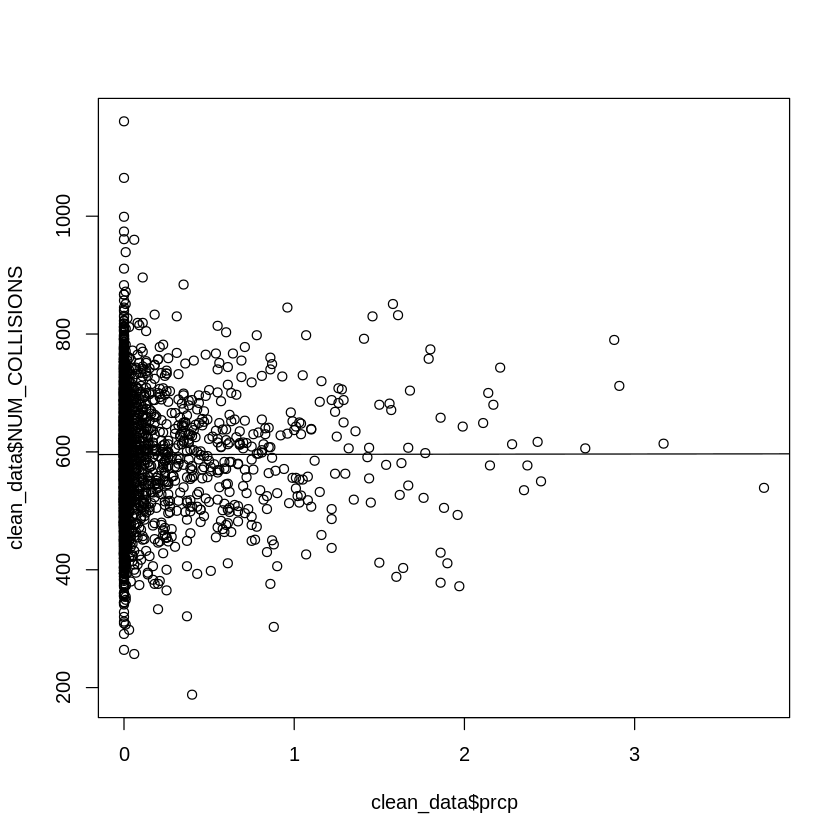

In [ ]:
plot(clean_data$NUM_COLLISIONS ~ clean_data$prcp)
abline(lm(clean_data$NUM_COLLISIONS ~ clean_data$prcp))

**UNCLEAN PRCP DATA**

In [ ]:
PRCP_RESULTS = lm(data$NUM_COLLISIONS ~ data$prcp)
summary(PRCP_RESULTS)


Call:
lm(formula = data$NUM_COLLISIONS ~ data$prcp)

Residuals:
    Min      1Q  Median      3Q     Max 
-407.58  -68.58    2.42   64.42  565.42 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.956e+02  1.923e+00 309.788   <2e-16 ***
data$prcp   8.588e-03  2.370e-01   0.036    0.971    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 100.2 on 2738 degrees of freedom
Multiple R-squared:  4.796e-07,	Adjusted R-squared:  -0.0003648 
F-statistic: 0.001313 on 1 and 2738 DF,  p-value: 0.9711


**CLEAN PRCP DATA**

In [ ]:
CLEAN_PRCP_RESULTS = lm(clean_data$NUM_COLLISIONS ~ clean_data$prcp)
summary(CLEAN_PRCP_RESULTS)


Call:
lm(formula = clean_data$NUM_COLLISIONS ~ clean_data$prcp)

Residuals:
    Min      1Q  Median      3Q     Max 
-407.67  -68.55    2.45   64.45  565.45 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      595.549      2.043  291.46   <2e-16 ***
clean_data$prcp    0.292      5.811    0.05     0.96    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 100.2 on 2738 degrees of freedom
Multiple R-squared:  9.22e-07,	Adjusted R-squared:  -0.0003643 
F-statistic: 0.002524 on 1 and 2738 DF,  p-value: 0.9599


We can see that the p-value stays essentially the same indicating that the prcp data even when cleaned does not have a significant relationship with the frequency of collisions.

# Removing **Outliers**

**MXPSD**

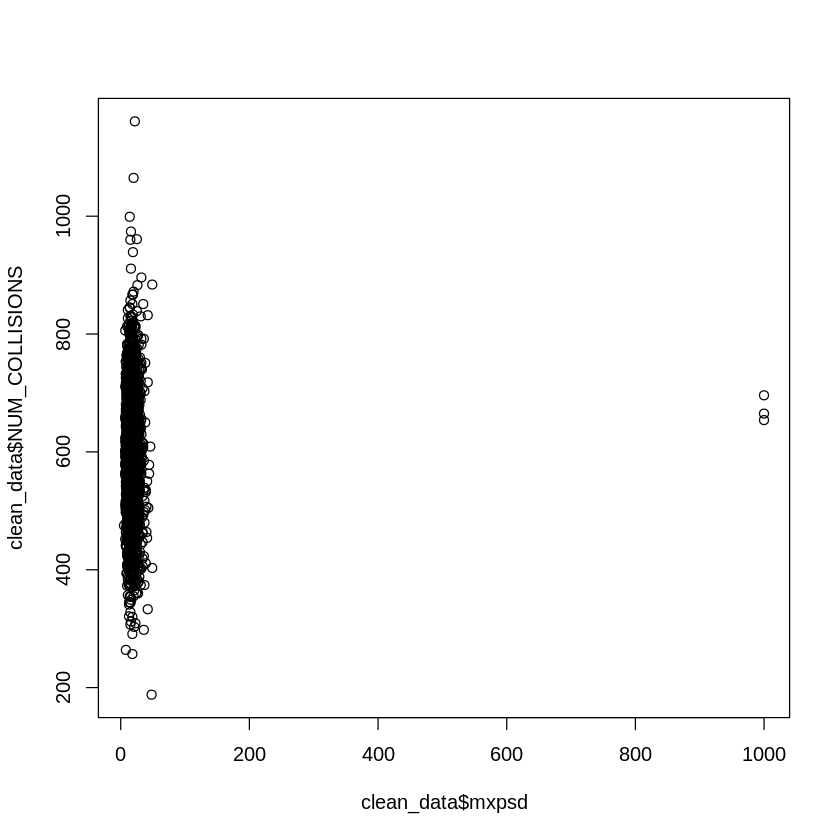

In [ ]:
plot(clean_data$mxpsd, clean_data$NUM_COLLISIONS)

In [ ]:
cor(clean_data$mxpsd, clean_data$NUM_COLLISIONS)

[1] 0.02117313

In [ ]:
# removed outliers for mxpsd where the values = 999.9
OutRemoved <- clean_data[clean_data$mxpsd != 999.9, ]

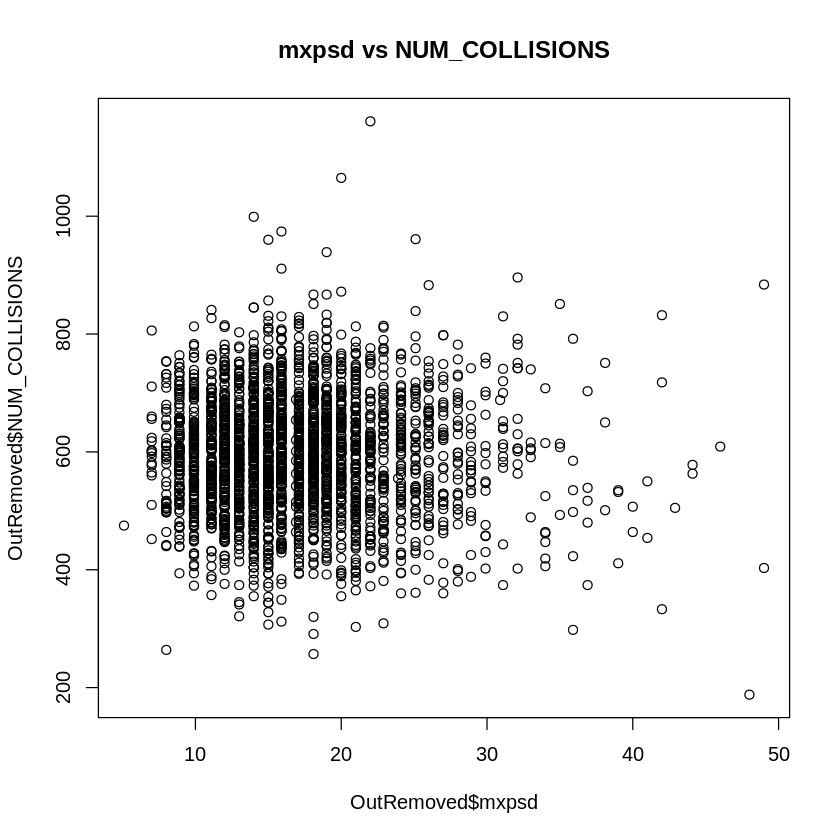

In [ ]:
plot(OutRemoved$mxpsd, OutRemoved$NUM_COLLISIONS, main = "mxpsd vs NUM_COLLISIONS")

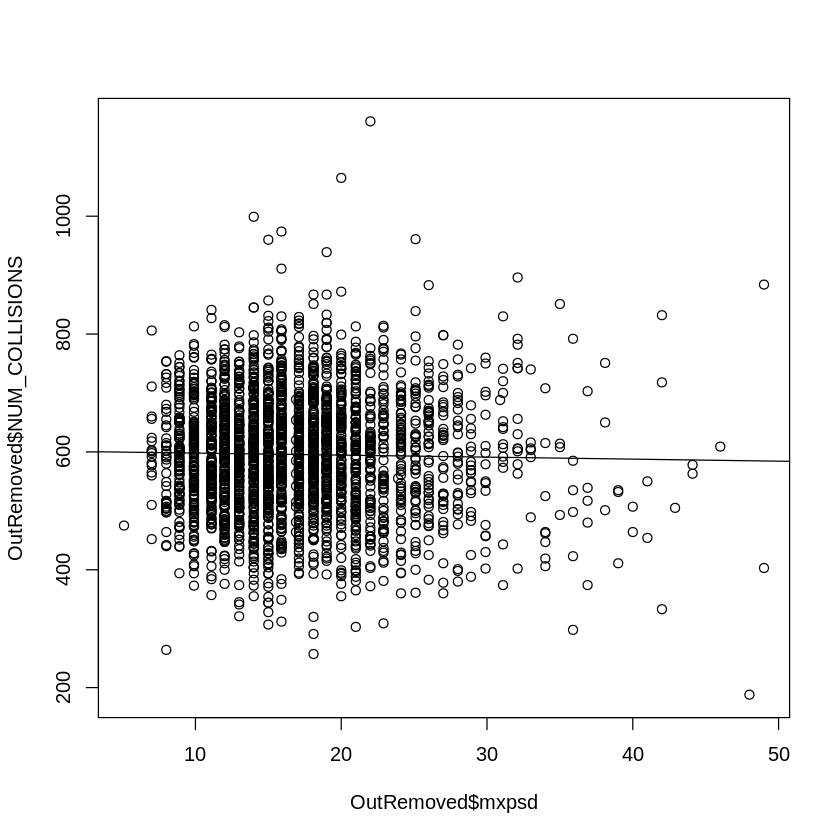

In [ ]:
plot(OutRemoved$NUM_COLLISIONS ~ OutRemoved$mxpsd)
abline(lm(OutRemoved$NUM_COLLISIONS ~ OutRemoved$mxpsd))

In [ ]:
cor(OutRemoved$mxpsd, OutRemoved$NUM_COLLISIONS)

[1] -0.02010204

It appears to be a very weak correlation still

**SLP**

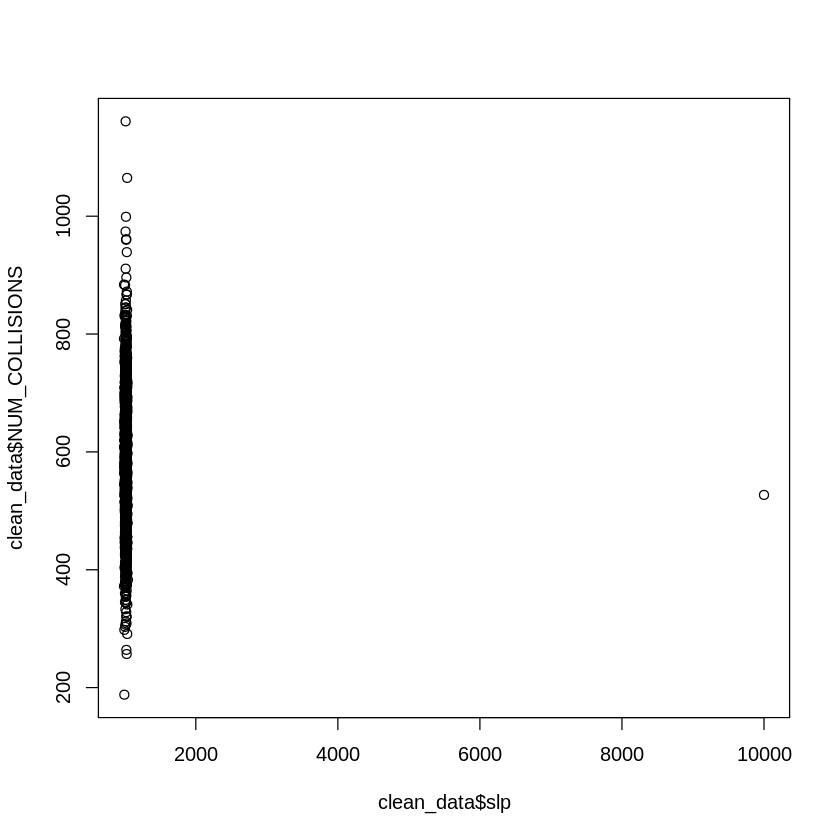

In [ ]:
plot(clean_data$slp, clean_data$NUM_COLLISIONS)

In [ ]:
cor(clean_data$slp, clean_data$NUM_COLLISIONS)

[1] -0.01510926

In [ ]:
# removed outliers for slp where the values = 9999.9
OutRemoved <- clean_data[clean_data$slp != 9999.9, ]

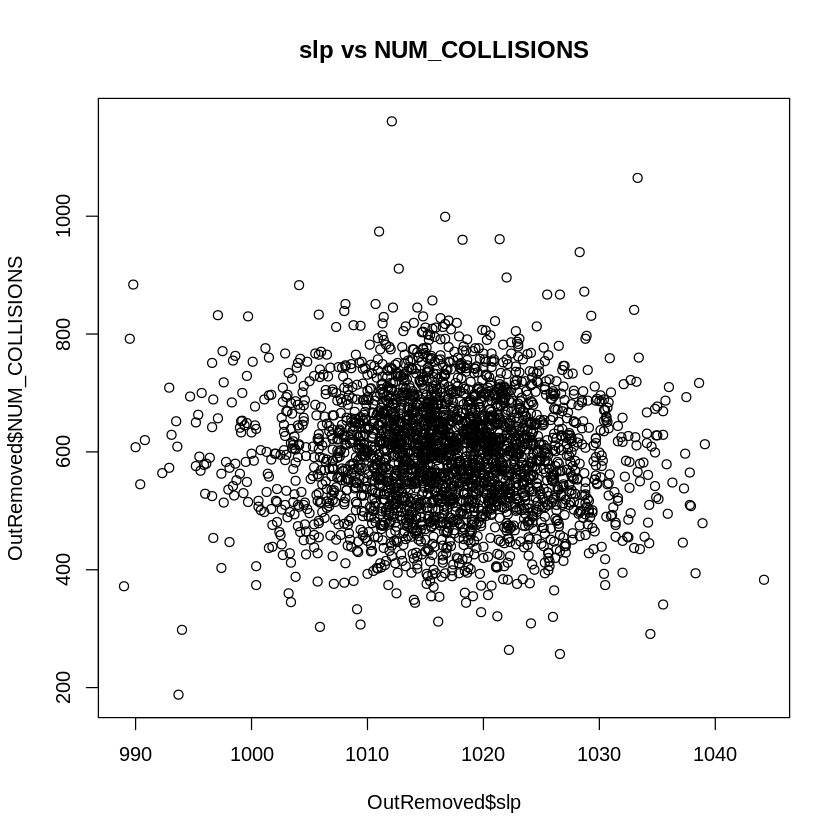

In [ ]:
plot(OutRemoved$slp, OutRemoved$NUM_COLLISIONS, main = "slp vs NUM_COLLISIONS")

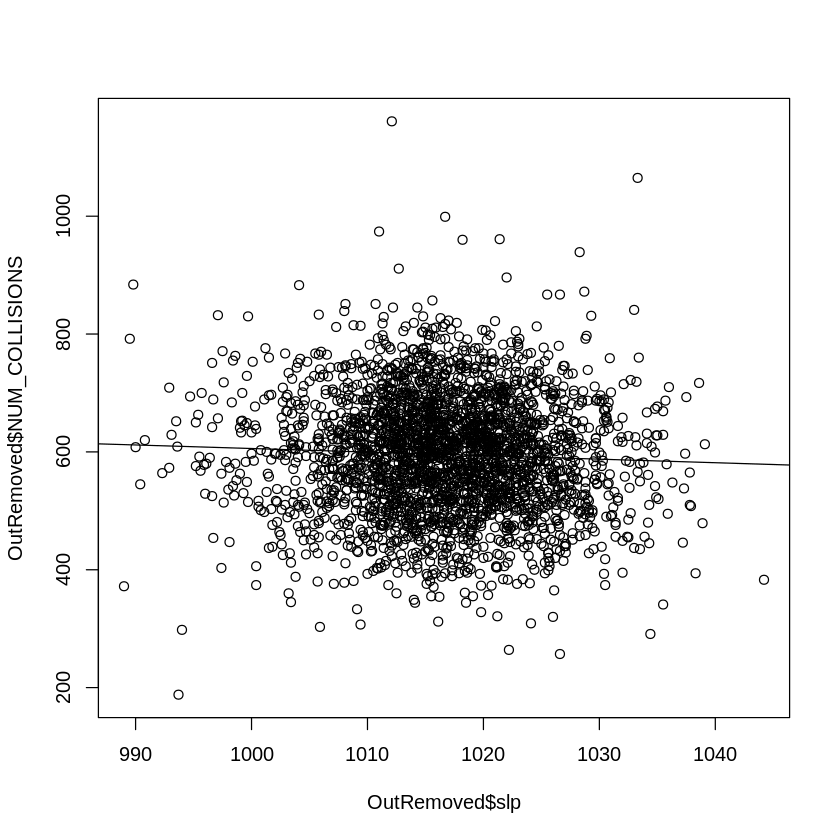

In [ ]:
plot(OutRemoved$NUM_COLLISIONS ~ OutRemoved$slp)
abline(lm(OutRemoved$NUM_COLLISIONS ~ OutRemoved$slp))

In [ ]:
cor(OutRemoved$slp, OutRemoved$NUM_COLLISIONS)

[1] -0.04586813

It appears to be a very weak correlation still.

**DEWP**

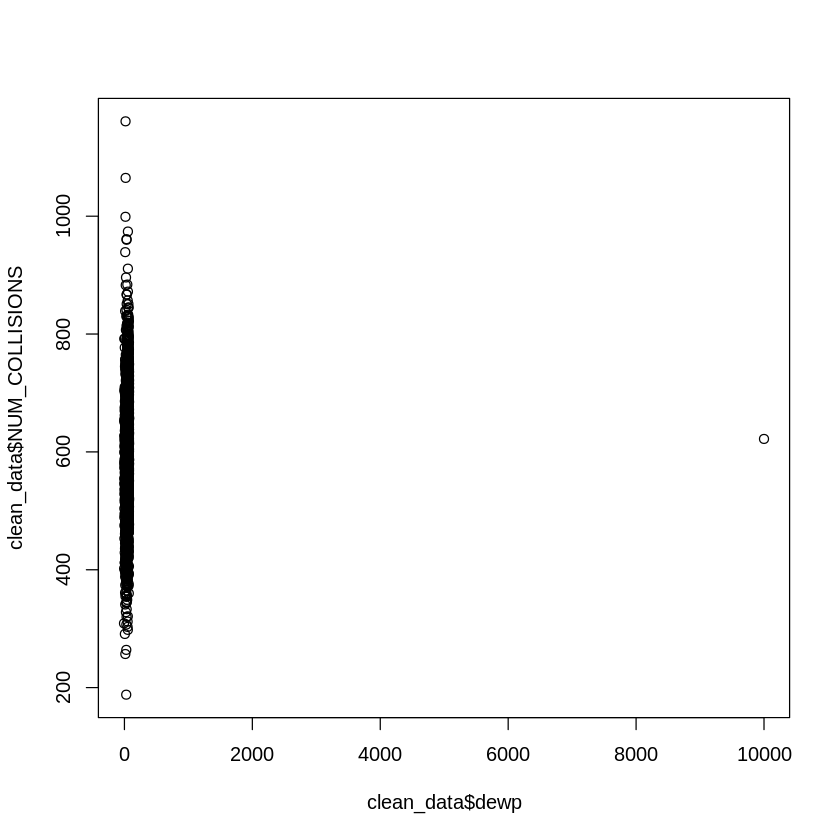

In [ ]:
plot(clean_data$dewp, clean_data$NUM_COLLISIONS)

In [ ]:
cor(clean_data$dewp, clean_data$NUM_COLLISIONS)

[1] 0.02091211

In [ ]:
# removed outliers for dewp where the values = 9999.9
OutRemoved <- clean_data[clean_data$dewp != 9999.9, ]

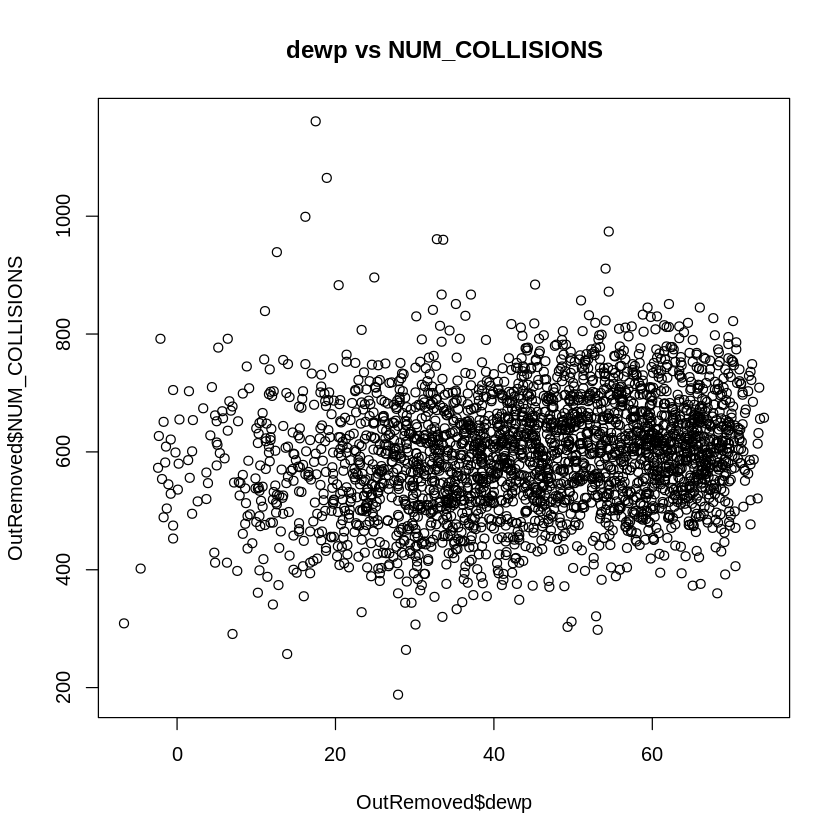

In [ ]:
plot(OutRemoved$dewp, OutRemoved$NUM_COLLISIONS, main = "dewp vs NUM_COLLISIONS")

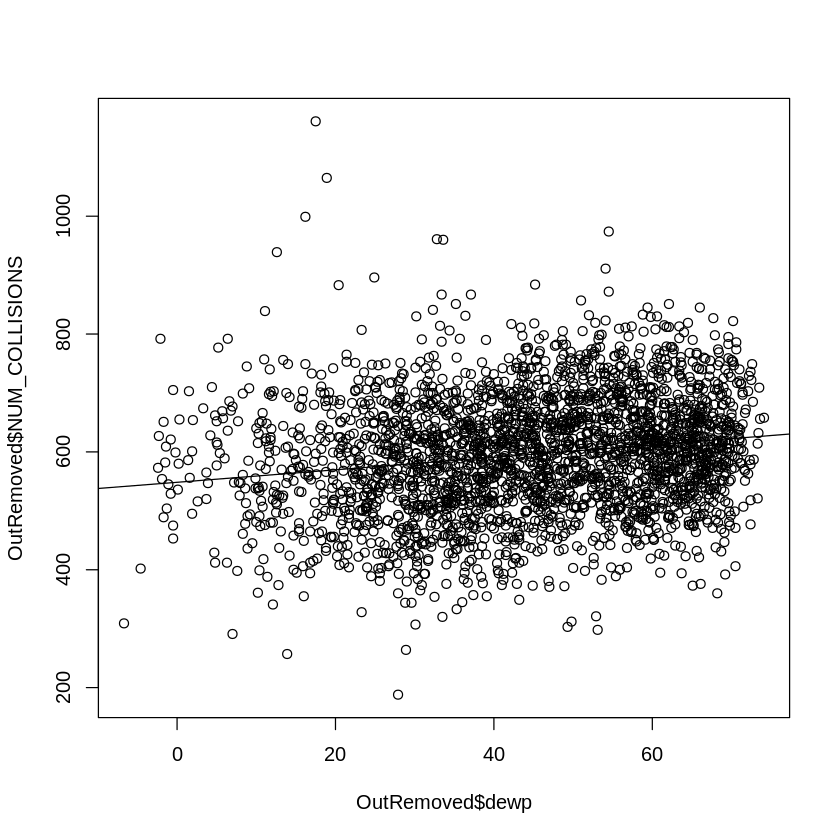

In [ ]:
plot(OutRemoved$NUM_COLLISIONS ~ OutRemoved$dewp)
abline(lm(OutRemoved$NUM_COLLISIONS ~ OutRemoved$dewp))

In [ ]:
cor(OutRemoved$dewp, OutRemoved$NUM_COLLISIONS)

[1] 0.1790772

There has been a big jump in correlation, still not substantial enough to say it's a correlating factor, but it does pose the question of whether it's relevant now.

**GUST**

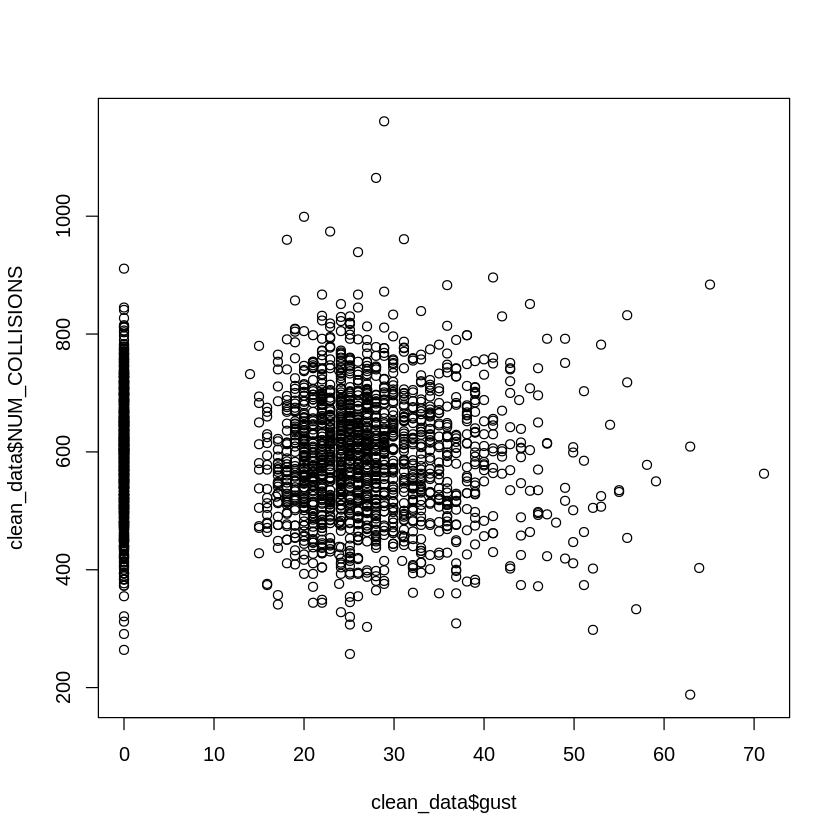

In [ ]:
plot(clean_data$gust, clean_data$NUM_COLLISIONS)

In [ ]:
cor(clean_data$gust, clean_data$NUM_COLLISIONS)

[1] -0.0418836

In [ ]:
# removed outliers for gust where the values = 0
OutRemoved <- clean_data[clean_data$gust != 0, ]

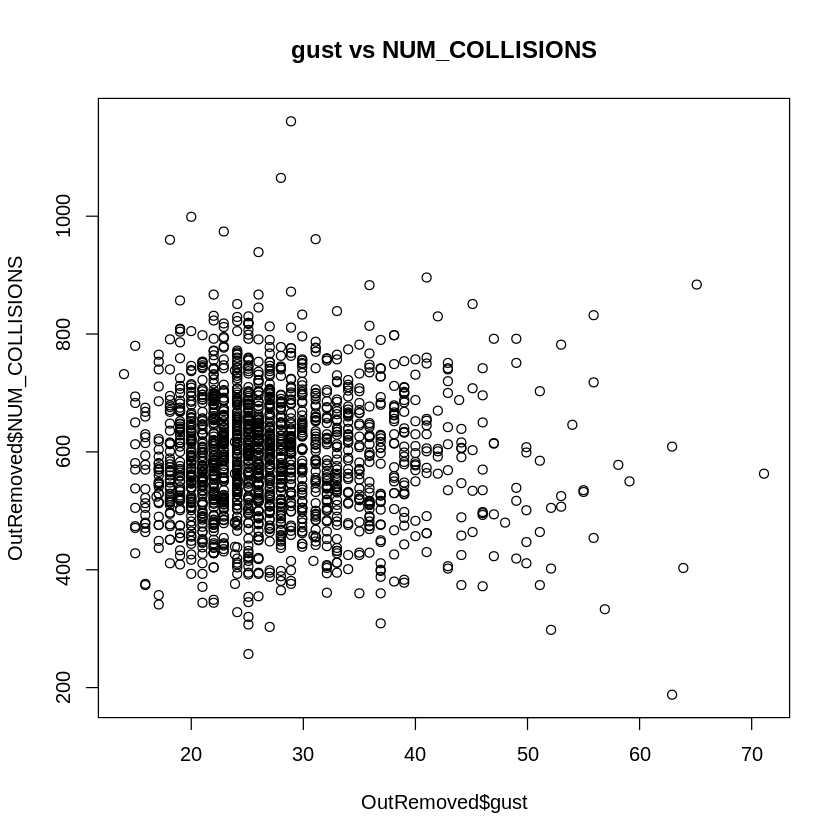

In [ ]:
plot(OutRemoved$gust, OutRemoved$NUM_COLLISIONS, main = "gust vs NUM_COLLISIONS")

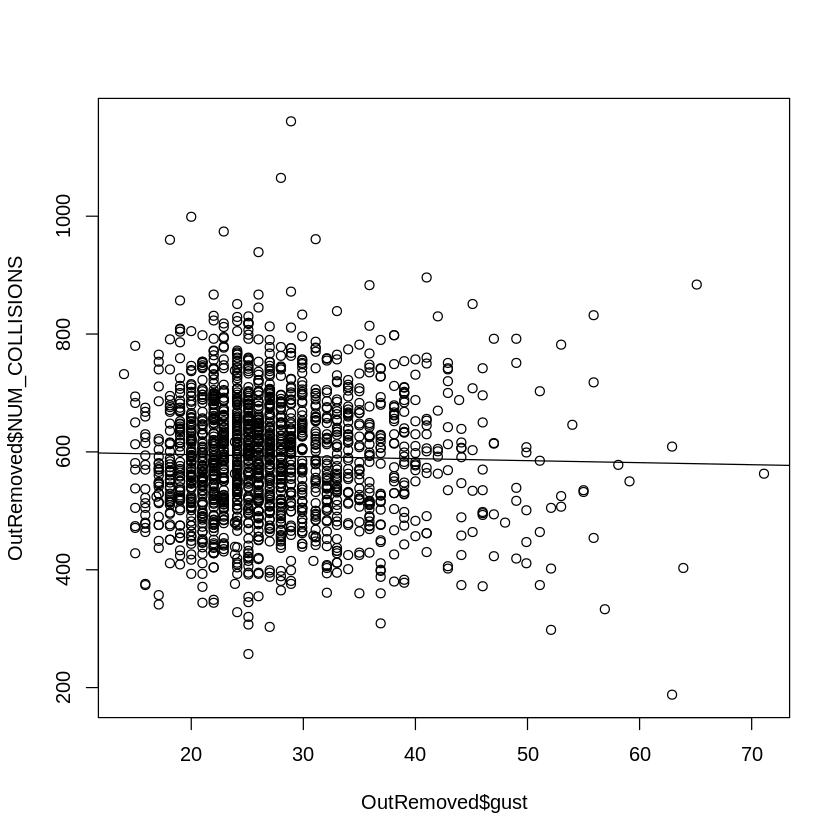

In [ ]:
plot(OutRemoved$NUM_COLLISIONS ~ OutRemoved$gust)
abline(lm(OutRemoved$NUM_COLLISIONS ~ OutRemoved$gust))

In [ ]:
cor(OutRemoved$gust, OutRemoved$NUM_COLLISIONS)

[1] -0.02439934

Removing all the values of 0 might not have been a great idea. However, even with a cleaner look at the data this way, it still appears to not be significant in the frequency of accidents.

# **Scaling the Data**

In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
# Load the caret library
library(caret)

# Perform Min-Max Scaling on clean_data
process <- preProcess(OutRemoved, method = c("range"))
OutRemoved_scaled <- predict(process, OutRemoved)

# Displays summary statistics of the original and scaled data
summary(OutRemoved)
summary(OutRemoved_scaled)


Loading required package: ggplot2



      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 3.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 6.000   Median :16.00  
 Mean   :4.039   Mean   :2016   Mean   : 6.531   Mean   :15.79  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2019   Max.   :12.000   Max.   :31.00  
                                                                
    collision_date      temp            dewp               slp      
 2012-07-01:   1   Min.   : 5.80   Min.   :   -6.70   Min.   : 989  
 2012-07-07:   1   1st Qu.:38.30   1st Qu.:   28.48   1st Qu.:1011  
 2012-07-08:   1   Median :47.40   Median :   40.60   Median :1015  
 2012-07-14:   1   Mean   :48.56   Mean   :   45.91   Mean   :1016  
 2012-07-16:   1   3rd Qu.:59.60   3rd Qu.:   53.40   3rd Qu.:1021  
 2012-07-17:   1   Max.   :85.30   Max.   : 9999.90   Max.   :1039

      day              year              mo               da        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1667   1st Qu.:0.2857   1st Qu.:0.1818   1st Qu.:0.2333  
 Median :0.5000   Median :0.5714   Median :0.4545   Median :0.5000  
 Mean   :0.5065   Mean   :0.5197   Mean   :0.5028   Mean   :0.4929  
 3rd Qu.:0.8333   3rd Qu.:0.8571   3rd Qu.:0.8182   3rd Qu.:0.7333  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                                                                    
    collision_date      temp             dewp               slp        
 2012-07-01:   1   Min.   :0.0000   Min.   :0.000000   Min.   :0.0000  
 2012-07-07:   1   1st Qu.:0.4088   1st Qu.:0.003515   1st Qu.:0.4326  
 2012-07-08:   1   Median :0.5233   Median :0.004727   Median :0.5269  
 2012-07-14:   1   Mean   :0.5379   Mean   :0.005258   Mean   :0.5314  
 2012-07-16:   1   3rd Qu.:0.6767   3rd Qu.:0.006006   3rd Qu.:0.6407  
 2012-07-17:   1

Here I've scaled the data

# **Min-Max Normalisation**

In [ ]:
library(caret)
process <- preProcess(clean_data, method = "range")

# Applying the normalisation
norm_dataset_1 <- predict(process, OutRemoved)
summary(norm_dataset_1)

      day              year              mo               da        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1667   1st Qu.:0.2857   1st Qu.:0.1818   1st Qu.:0.2333  
 Median :0.5000   Median :0.5714   Median :0.4545   Median :0.5000  
 Mean   :0.5065   Mean   :0.5197   Mean   :0.5028   Mean   :0.4929  
 3rd Qu.:0.8333   3rd Qu.:0.8571   3rd Qu.:0.8182   3rd Qu.:0.7333  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                                                                    
    collision_date      temp             dewp               slp          
 2012-07-01:   1   Min.   :0.0000   Min.   :0.000000   Min.   :0.000000  
 2012-07-07:   1   1st Qu.:0.4017   1st Qu.:0.003515   1st Qu.:0.002405  
 2012-07-08:   1   Median :0.5142   Median :0.004727   Median :0.002930  
 2012-07-14:   1   Mean   :0.5286   Mean   :0.005258   Mean   :0.002954  
 2012-07-16:   1   3rd Qu.:0.6650   3rd Qu.:0.006006   3rd Qu.:0.003562  
 201

Here I've normalised the cleaned unscaled data

In [ ]:
library(caret)
process <- preProcess(OutRemoved_scaled, method = "range")

# Applying the normalisation
norm_dataset_1 <- predict(process, OutRemoved_scaled)
summary(norm_dataset_1)

      day              year              mo               da        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1667   1st Qu.:0.2857   1st Qu.:0.1818   1st Qu.:0.2333  
 Median :0.5000   Median :0.5714   Median :0.4545   Median :0.5000  
 Mean   :0.5065   Mean   :0.5197   Mean   :0.5028   Mean   :0.4929  
 3rd Qu.:0.8333   3rd Qu.:0.8571   3rd Qu.:0.8182   3rd Qu.:0.7333  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                                                                    
    collision_date      temp             dewp               slp        
 2012-07-01:   1   Min.   :0.0000   Min.   :0.000000   Min.   :0.0000  
 2012-07-07:   1   1st Qu.:0.4088   1st Qu.:0.003515   1st Qu.:0.4326  
 2012-07-08:   1   Median :0.5233   Median :0.004727   Median :0.5269  
 2012-07-14:   1   Mean   :0.5379   Mean   :0.005258   Mean   :0.5314  
 2012-07-16:   1   3rd Qu.:0.6767   3rd Qu.:0.006006   3rd Qu.:0.6407  
 2012-07-17:   1

Here I've normalised the clean-scaled data

In [ ]:
# writes the normalised dataset to a CSV file for Assignment 2
write.csv(norm_dataset_1, file = "/content/assignment_2_normalised_dataset_1.csv")

In [ ]:
# word count limit reached, writing here so it doesn't count...
#
# creating more datasets for Assignment 2

In [ ]:
library(caret)

# Create a data frame with only the NUM_COLLISIONS column
data_for_preprocess <- data.frame(NUM_COLLISIONS = OutRemoved$NUM_COLLISIONS)

# Creates the pre-processing object specifying only the normalisation
process <- preProcess(data_for_preprocess, method = "range")

# Applying the normalization only to NUM_COLLISIONS
norm_dataset_2 <- predict(process, newdata = data_for_preprocess)

# Replaces the original NUM_COLLISIONS with the normalised values
norm_dataset_2 <- data.frame(NUM_COLLISIONS = norm_dataset_2$NUM_COLLISIONS)

# Add the rest of the columns from OutRemoved to norm_dataset_2
norm_dataset_2 <- cbind(norm_dataset_2, OutRemoved[, -which(names(OutRemoved) == "NUM_COLLISIONS")])
summary(norm_dataset_2)

 NUM_COLLISIONS        day             year            mo        
 Min.   :0.0000   Min.   :1.000   Min.   :2012   Min.   : 1.000  
 1st Qu.:0.3422   1st Qu.:2.000   1st Qu.:2014   1st Qu.: 3.000  
 Median :0.4162   Median :4.000   Median :2016   Median : 6.000  
 Mean   :0.4161   Mean   :4.039   Mean   :2016   Mean   : 6.531  
 3rd Qu.:0.4841   3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000  
 Max.   :1.0000   Max.   :7.000   Max.   :2019   Max.   :12.000  
                                                                 
       da           collision_date      temp            dewp         
 Min.   : 1.00   2012-07-01:   1   Min.   : 5.80   Min.   :   -6.70  
 1st Qu.: 8.00   2012-07-07:   1   1st Qu.:38.30   1st Qu.:   28.48  
 Median :16.00   2012-07-08:   1   Median :47.40   Median :   40.60  
 Mean   :15.79   2012-07-14:   1   Mean   :48.56   Mean   :   45.91  
 3rd Qu.:23.00   2012-07-16:   1   3rd Qu.:59.60   3rd Qu.:   53.40  
 Max.   :31.00   2012-07-17:   1   Max.   :85.30   M

In [ ]:
# writes the second normalised dataset to a CSV file for Assignment 2
write.csv(norm_dataset_2, file = "/content/assignment_2_normalised_dataset_2.csv")

In [ ]:
library(caret)

# Select the weather variables from OutRemoved
weather_data <- OutRemoved[, c("temp", "dewp", "slp", "visib", "wdsp", "mxpsd", "gust", "max", "min", "prcp", "fog")]

# Create the pre-processing object specifying only the normalisation
process <- preProcess(weather_data, method = "range")

# Applying the normalisation only to the weather variables
norm_weather <- predict(process, newdata = weather_data)

# Replace the original weather variables with the normalised values
norm_weather <- as.data.frame(norm_weather)

# Combines the normalised weather variables with the rest of the columns
norm_dataset_3 <- cbind(norm_weather, OutRemoved[, -which(names(OutRemoved) %in% c("temp", "dewp", "slp", "visib", "wdsp", "mxpsd", "gust", "max", "min", "prcp", "fog"))])

# Summary of the normalized dataset
summary(norm_dataset_3)

      temp             dewp               slp             visib       
 Min.   :0.0000   Min.   :0.000000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.4088   1st Qu.:0.003515   1st Qu.:0.4326   1st Qu.:0.6809  
 Median :0.5233   Median :0.004727   Median :0.5269   Median :0.9255  
 Mean   :0.5379   Mean   :0.005258   Mean   :0.5314   Mean   :0.8148  
 3rd Qu.:0.6767   3rd Qu.:0.006006   3rd Qu.:0.6407   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.000000   Max.   :1.0000   Max.   :1.0000  
                                                                      
      wdsp            mxpsd             gust             max        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2027   1st Qu.:0.2119   1st Qu.:0.1401   1st Qu.:0.3415  
 Median :0.2653   Median :0.2857   Median :0.2102   Median :0.4622  
 Mean   :0.2749   Mean   :0.3067   Mean   :0.2335   Mean   :0.4681  
 3rd Qu.:0.3307   3rd Qu.:0.3571   3rd Qu.:0.2995   3rd Qu.:0.5963  
 Max.   :1.0000   

In [ ]:
# writes the third normalised dataset to a CSV file for Assignment 2
write.csv(norm_dataset_3, file = "/content/assignment_2_normalised_dataset_3.csv")

# **Scaled Data Plotting**

Now that the cleaned data has been scaled, I'm going to compare it to the unscaled data to see if there is a noticeable difference.

**Unscaled MXPSD Data**

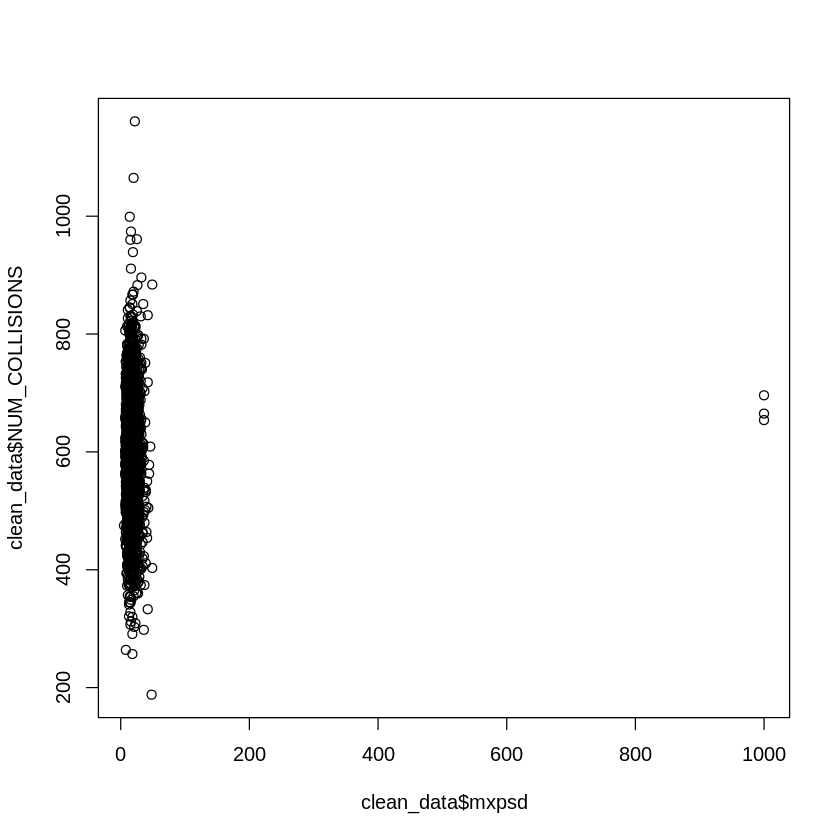

In [ ]:
plot(clean_data$mxpsd, clean_data$NUM_COLLISIONS)

In [ ]:
cor(clean_data$mxpsd, clean_data$NUM_COLLISIONS)

[1] 0.02117313

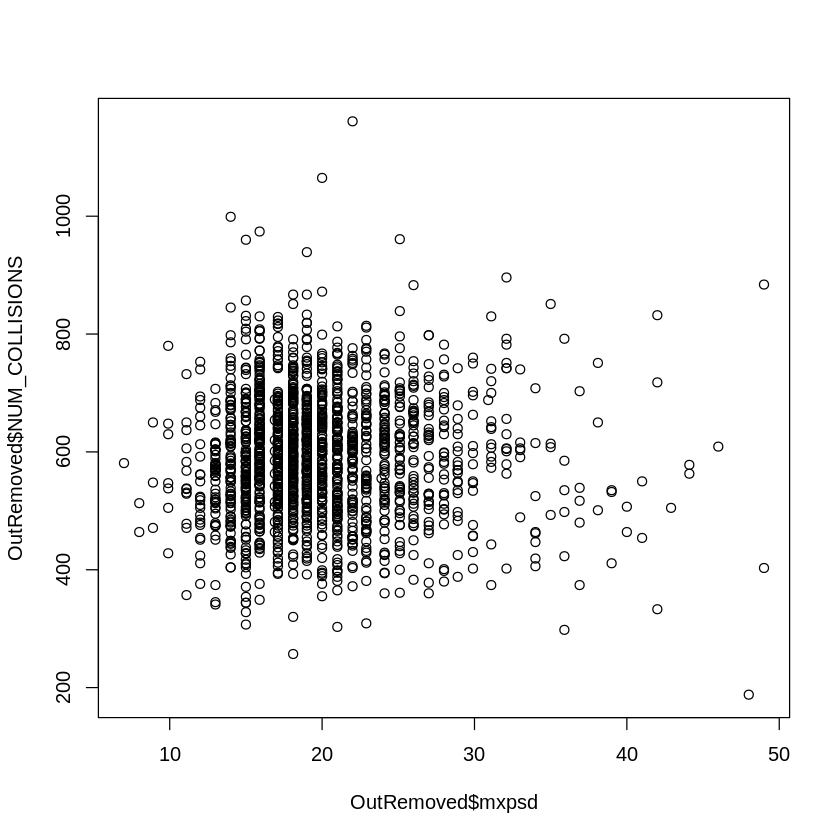

In [ ]:
plot(OutRemoved$mxpsd, OutRemoved$NUM_COLLISIONS)

In [ ]:
cor(OutRemoved$mxpsd, OutRemoved$NUM_COLLISIONS)

[1] -0.008926996

Scaled MXPSD Data

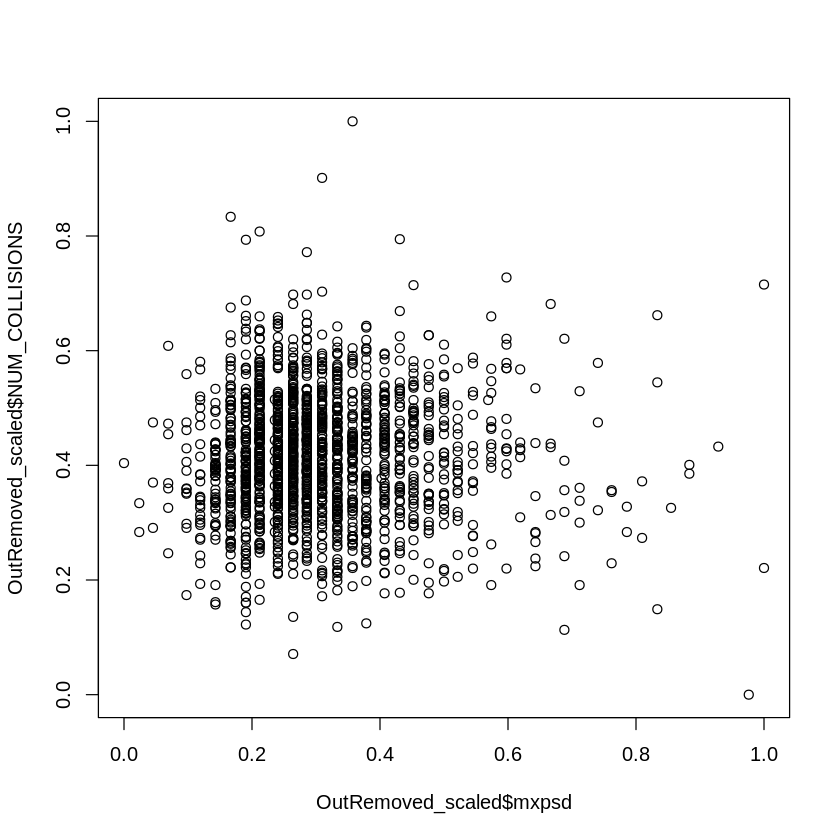

In [ ]:
plot(OutRemoved_scaled$mxpsd, OutRemoved_scaled$NUM_COLLISIONS)

In [ ]:
cor(OutRemoved_scaled$mxpsd, OutRemoved_scaled$NUM_COLLISIONS)

[1] -0.008926996

From what I can tell here the scaled data is identical to the removed outlier data. At least for mxpsd, this is worse than the clean_data$mxpsd

**Unscaled MIN Data**

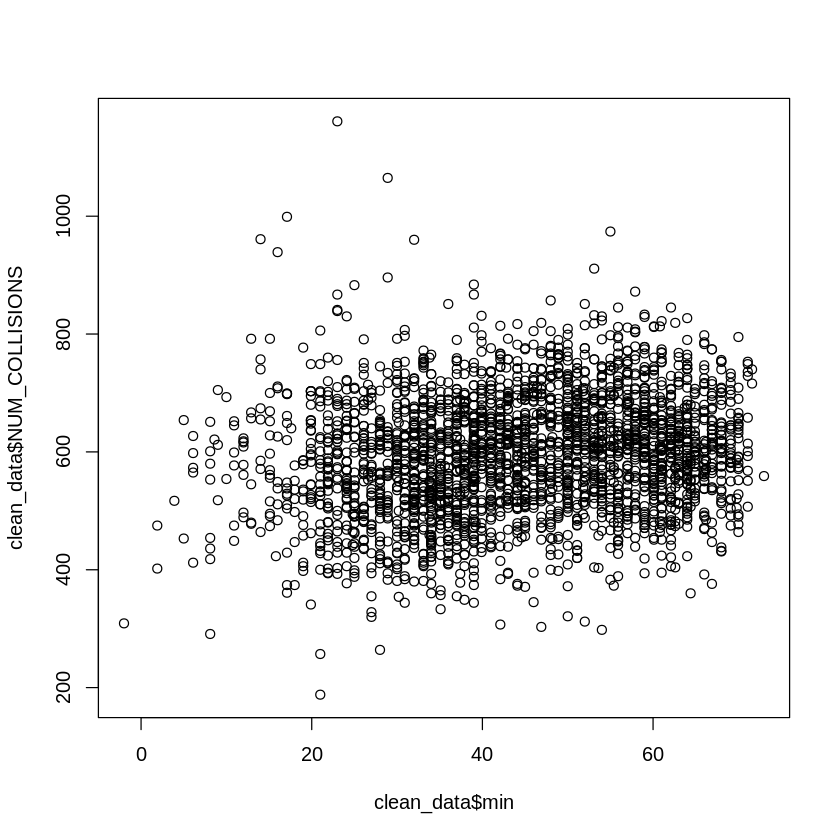

In [ ]:
plot(clean_data$min, clean_data$NUM_COLLISIONS)

In [ ]:
cor(clean_data$min, clean_data$NUM_COLLISIONS)

[1] 0.1693521

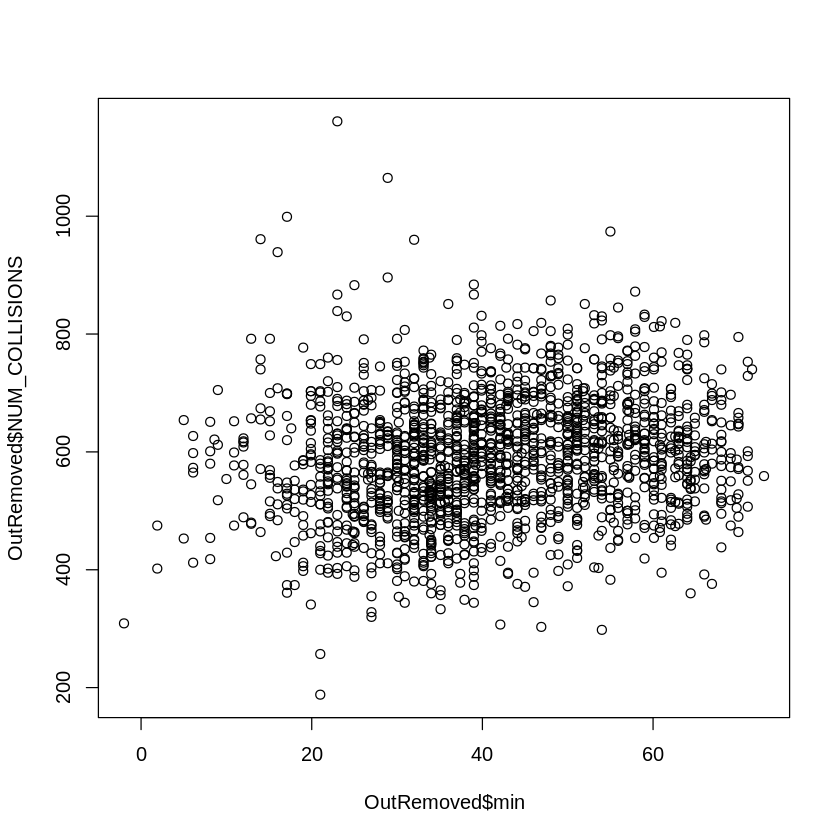

In [ ]:
plot(OutRemoved$min, OutRemoved$NUM_COLLISIONS)

In [ ]:
cor(OutRemoved$min, OutRemoved$NUM_COLLISIONS)

[1] 0.163927

**Scaled MIN Data**

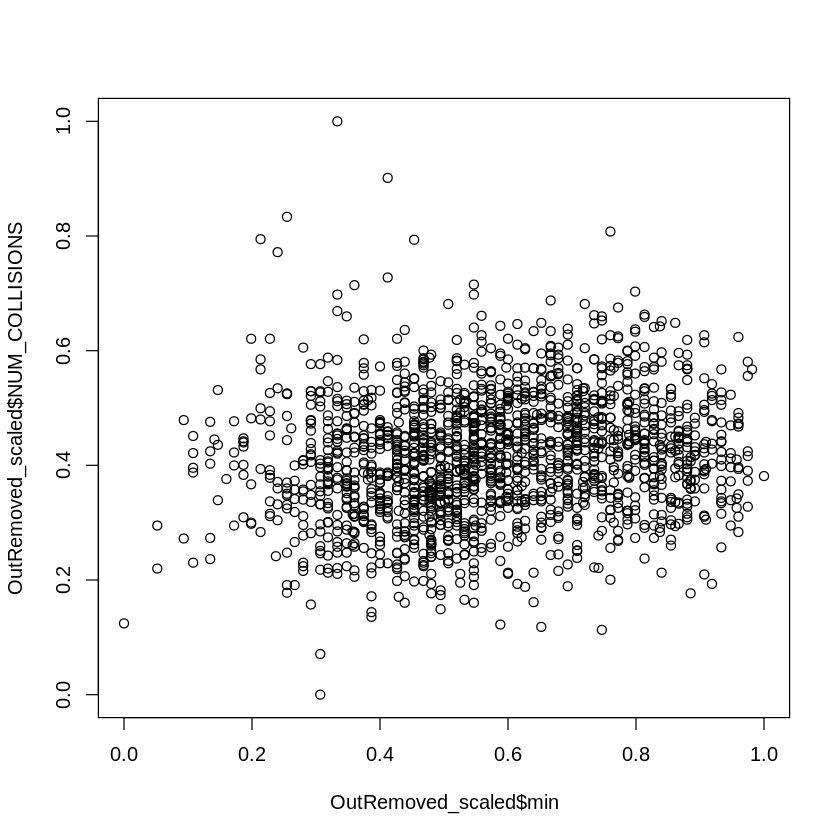

In [ ]:
plot(OutRemoved_scaled$min, OutRemoved_scaled$NUM_COLLISIONS)

In [ ]:
cor(OutRemoved_scaled$min, OutRemoved_scaled$NUM_COLLISIONS)

[1] 0.163927

The same goes for here too, it appears to be exact to the OutRemoved$min, as well as it's slightly worse than the clean_data. This is odd to see in my opinion. I would have expected for it to be slightly better and as well as for it to be different across the board, not the same.

I will do this again for gust now too, and if it's also the same, I will assume all are the same and continue with the analysis. (This is quite strange and I'm not too sure what's caused this)

**Unscaled GUST Data**

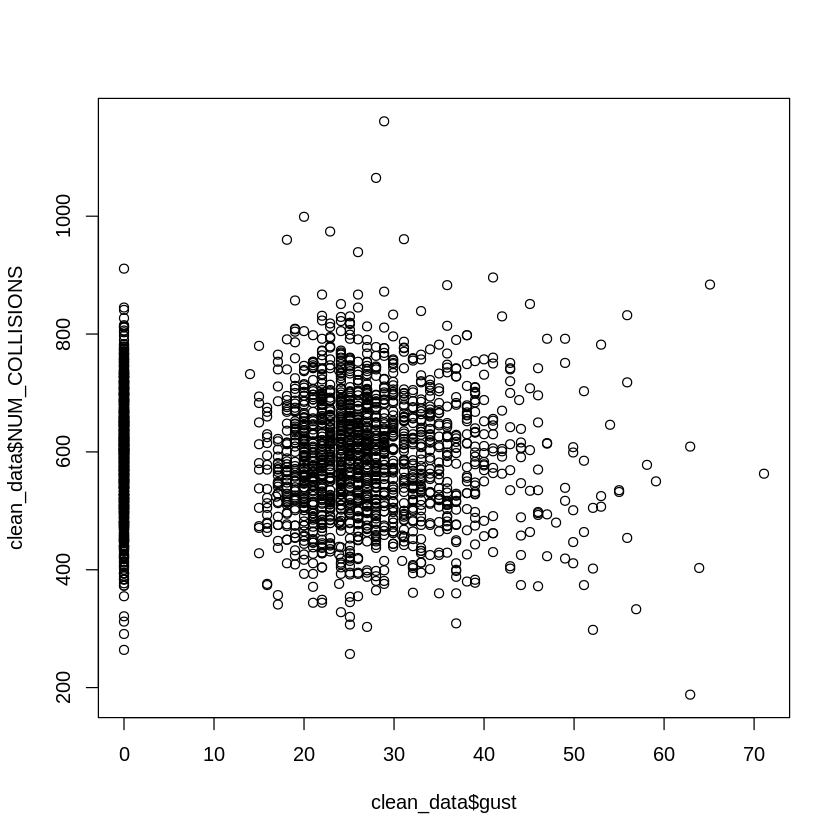

In [ ]:
plot(clean_data$gust, clean_data$NUM_COLLISIONS)

In [ ]:
cor(clean_data$gust, clean_data$NUM_COLLISIONS)

[1] -0.0418836

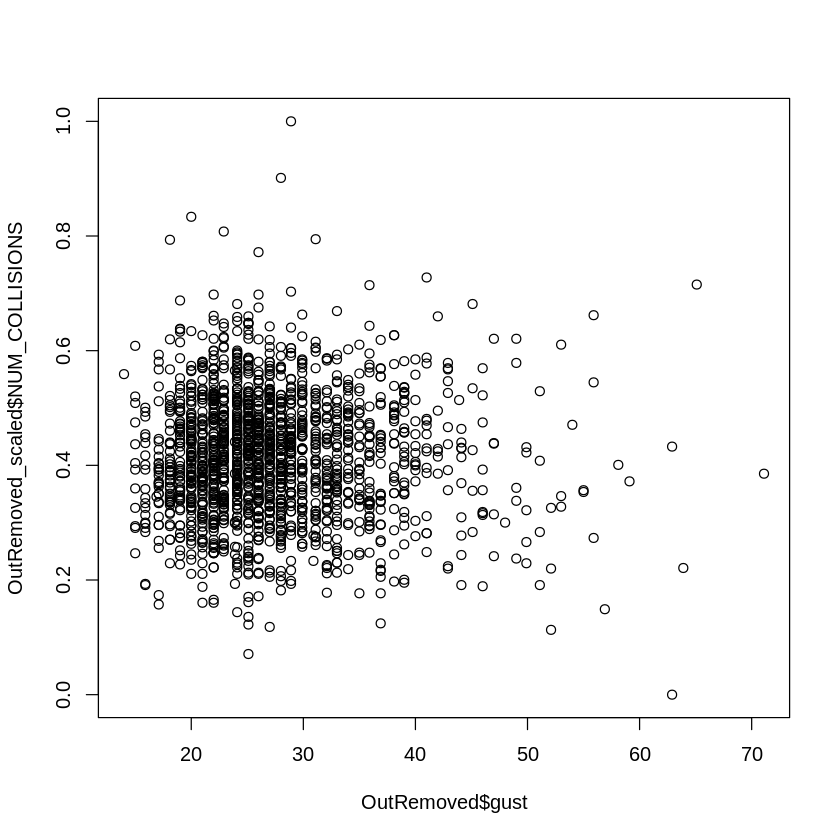

In [ ]:
plot(OutRemoved$gust, OutRemoved_scaled$NUM_COLLISIONS)

In [ ]:
cor(OutRemoved$gust, OutRemoved$NUM_COLLISIONS)

[1] -0.02439934

**Scaled GUST Data**

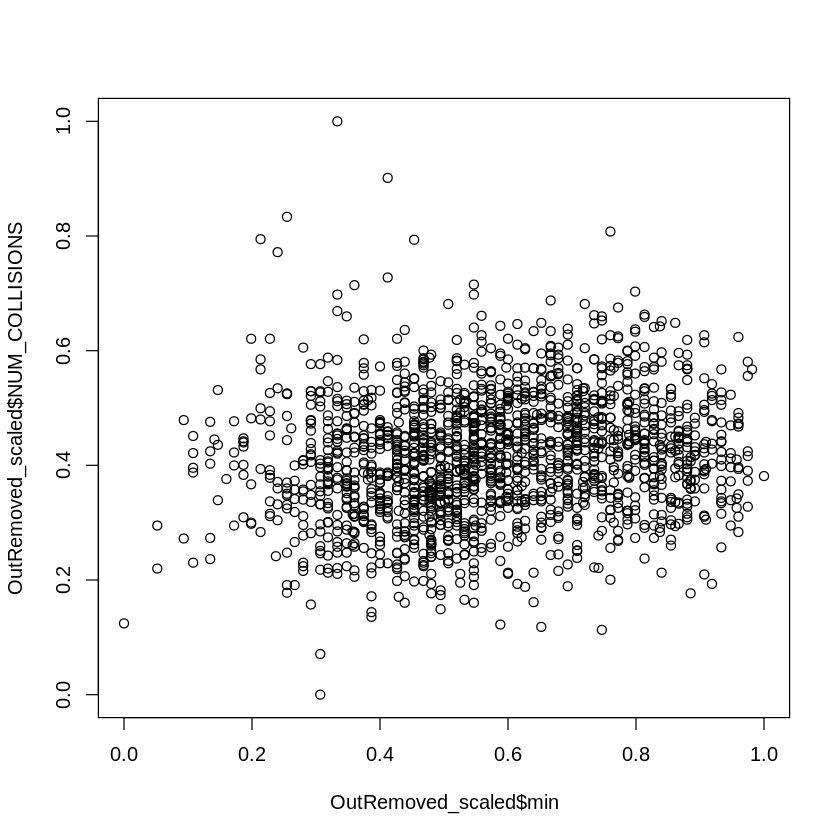

In [ ]:
plot(OutRemoved_scaled$min, OutRemoved_scaled$NUM_COLLISIONS)

In [ ]:
cor(OutRemoved_scaled$gust, OutRemoved_scaled$NUM_COLLISIONS)

[1] -0.02439934

Once again same pattern of it being worse than clean_data and outliers removed being the same as the scaled data. This is very strange, but I will continue with the analysis with the data I have.

# **Conclusion**

I would also like to state I'm not entirely sure that the scaling and normalisation of my data was done correctly. I think I have, but with the results it provided when testing, it brings me to think it has not been done correctly, but I still think with the analysis I have done up to that point I can say that the weather is not a major determiner for collisions in New York City.

In conclusion, the key bits of data that seem to be a correlator when trying to predict the frequency of collisions based on the weather are the temperature variables, temp, min, and max. Other variables may also influence the frequency of collisions, such as gust, or prcp. However, in my analysis, I could not find any definite proof that there is one variable that causes accidents more than others. I would say after analysing the data it is a mixture of variables that would cause accidents, though I cannot say this for sure.


# **Bibliography**

Acharya, S. (2021) How to improve the accuracy of a Regression Model. Available at: https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604 (Accessed: 12 March 2024).

Frost, J. (2017) How To Interpret R-squared in Regression Analysis. Available at: https://statisticsbyjim.com/regression/interpret-r-squared-regression/ (Accessed: 12 March 2024).

Hou, K. et al. (2020) 'Ambient temperatures associated with increased risk of motor vehicle crashes in New York and Chicago', ELSEVIER, 830(1), pp.1-10.

Huang, Y. and Li, R. (2022) The lockdown, mobility, and spatial health disparities in COVID-19 pandemic: A case study of New York City. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8806179/ (Accessed: 14 March 2024).

Medina, R.M., Cervone, G. and Waters, N. (2017) 'Characterizing and Predicting Traffic Accidents in Extreme Weather Environments', The Professional Geographer, 69(1), pp.126-37.

Mulani, S. (2022) How to Normalize data in R [3 easy methods]. Available at: https://www.digitalocean.com/community/tutorials/normalize-data-in-r (Accessed: 12 March 2024).

Rego, F. (2015) QUICK GUIDE: INTERPRETING SIMPLE LINEAR MODEL OUTPUT IN R. Available at: https://feliperego.github.io/blog/2015/10/23/Interpreting-Model-Output-In-R (Accessed: 11 March 2024).

Sereno (2023) Comparison of Pearson vs Spearman Correlation Coefficients. Available at: https://www.analyticsvidhya.com/blog/2021/03/comparison-of-pearson-and-spearman-correlation-coefficients/ (Accessed: 10 March 2024).

Shaaban, K. and Ibrahim, M. (2021) 'Analysis and Identification of Contributing Factors of Traffic Crashes in New York City', ELSEVIER, 55(1), pp.1696-703.

U.S Department of Transportation (2023) How Do Weather Events Impact Roads? Available at: https://ops.fhwa.dot.gov/weather/q1_roadimpact.htm (Accessed: 11 March 2024).

